In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [30]:
df = pd.read_csv('model_results/metric_results.csv', index_col=0)
df_timeseries = pd.read_csv('model_results/metric_results_unique_id.csv', index_col=0)
num_timeseries = {'amazon-google':20, 'glucose':16, 'm5':70, 'meditation':6}
metrics = ['mase', 'wql', 'pce', 'mpiqr']
# metrics = ['tce_20', 'tce_40', 'tce_60', 'tce_80']
# datasets = np.unique(df['dataset'])
# models = np.unique(df['model'])
datasets = ['amazon-google', 'meditation', 'm5', 'glucose']
models = ['timesfm', 'moirai', 'chronos', 'lag-llama-context', 'nbeats-context', 'autoarima']
# model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(models)]
model_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#1f77b4','#e6ab02']
dataset_markers = ['o', 'v', '*', 'P']
confidences = [20,40,60,80]
# models = ['timesfm64', 'moirai64', 'chronos64', 'lag-llama', 'nbeats', 'autoarima']
# models = ['timesfm', 'moirai', 'chronos', 'nbeats', 'autoarima']
df

dataset           model    metric  avg_result         1         2  \
0    amazon-google         timesfm      mase    0.626710  0.430666  0.500570   
1    amazon-google         timesfm       wql   39.109267  0.569183  0.662820   
2    amazon-google         timesfm       pce    0.030145  0.011274  0.008685   
3    amazon-google         timesfm     mpiqr    0.179825  0.147943  0.158860   
4    amazon-google         timesfm    tce_80    0.014083  0.013927  0.014583   
..             ...             ...       ...         ...       ...       ...   
763     meditation  nbeats-context  mpiqr_20    4.404175  4.347658  4.450248   
764     meditation  nbeats-context     tce_0    0.127780  0.057692  0.136186   
765     meditation  nbeats-context    msiw_0    0.000000  0.000000  0.000000   
766     meditation  nbeats-context    msis_0    2.425705  1.463976  2.077575   
767     meditation  nbeats-context   mpiqr_0         NaN       NaN       NaN   

            3         4         5         6  ...        39        40  \
0    0.533389  0.549497  0.558109  0.564419  ...  0.670660  0.664018   
1    0.702529  0.721602  0.731187  0.739626  ...  0.863626  0.857371   
2    0.008188  0.009611  0.020062  0.007527  ...  0.044444  0.035854   
3    0.164309  0.170129  0.172340  0.173008  ...  0.189807  0.187360   
4    0.008565  0.006713  0.007330  0.004514  ...  0.020023  0.015355   
..        ...       ...       ...       ...  ...       ...       ...   
763  4.402718  4.380576  4.361060  4.433287  ...  4.333807  4.362062   
764  0.092873  0.092061  0.139266  0.138039  ...  0.113665  0.124038   
765  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
766  2.115829  1.986114  2.149677  2.317204  ...  2.642347  2.628028   
767       NaN       NaN       NaN       NaN  ...       NaN       NaN   

           41        42        43        44        45        46        47  \
0    0.669928  0.669465  0.672305  0.673199  0.673113  0.677770  0.674093   
1    0.862537  0.861212  0.865427  0.868556  0.868471  0.873211  0.866997   
2    0.028807  0.038803  0.031653  0.039035  0.032485  0.037123  0.037474   
3    0.187184  0.188618  0.186606  0.184370  0.186646  0.186430  0.185243   
4    0.010648  0.020293  0.012654  0.016165  0.014738  0.015779  0.013580   
..        ...       ...       ...       ...       ...       ...       ...   
763  4.469867  4.356328  4.314740  4.382442  4.416155  4.347174  4.358539   
764  0.086229  0.139858  0.126783  0.112630  0.149346  0.133202  0.123847   
765  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
766  2.592997  2.634234  2.702662  2.574028  2.562094  2.624710  2.547171   
767       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           48  
0    0.671572  
1    0.864564  
2    0.035948  
3    0.189342  
4    0.015123  
..        ...  
763  4.318366  
764  0.066468  
765  0.000000  
766  2.476823  
767       NaN  

[768 rows x 52 columns]

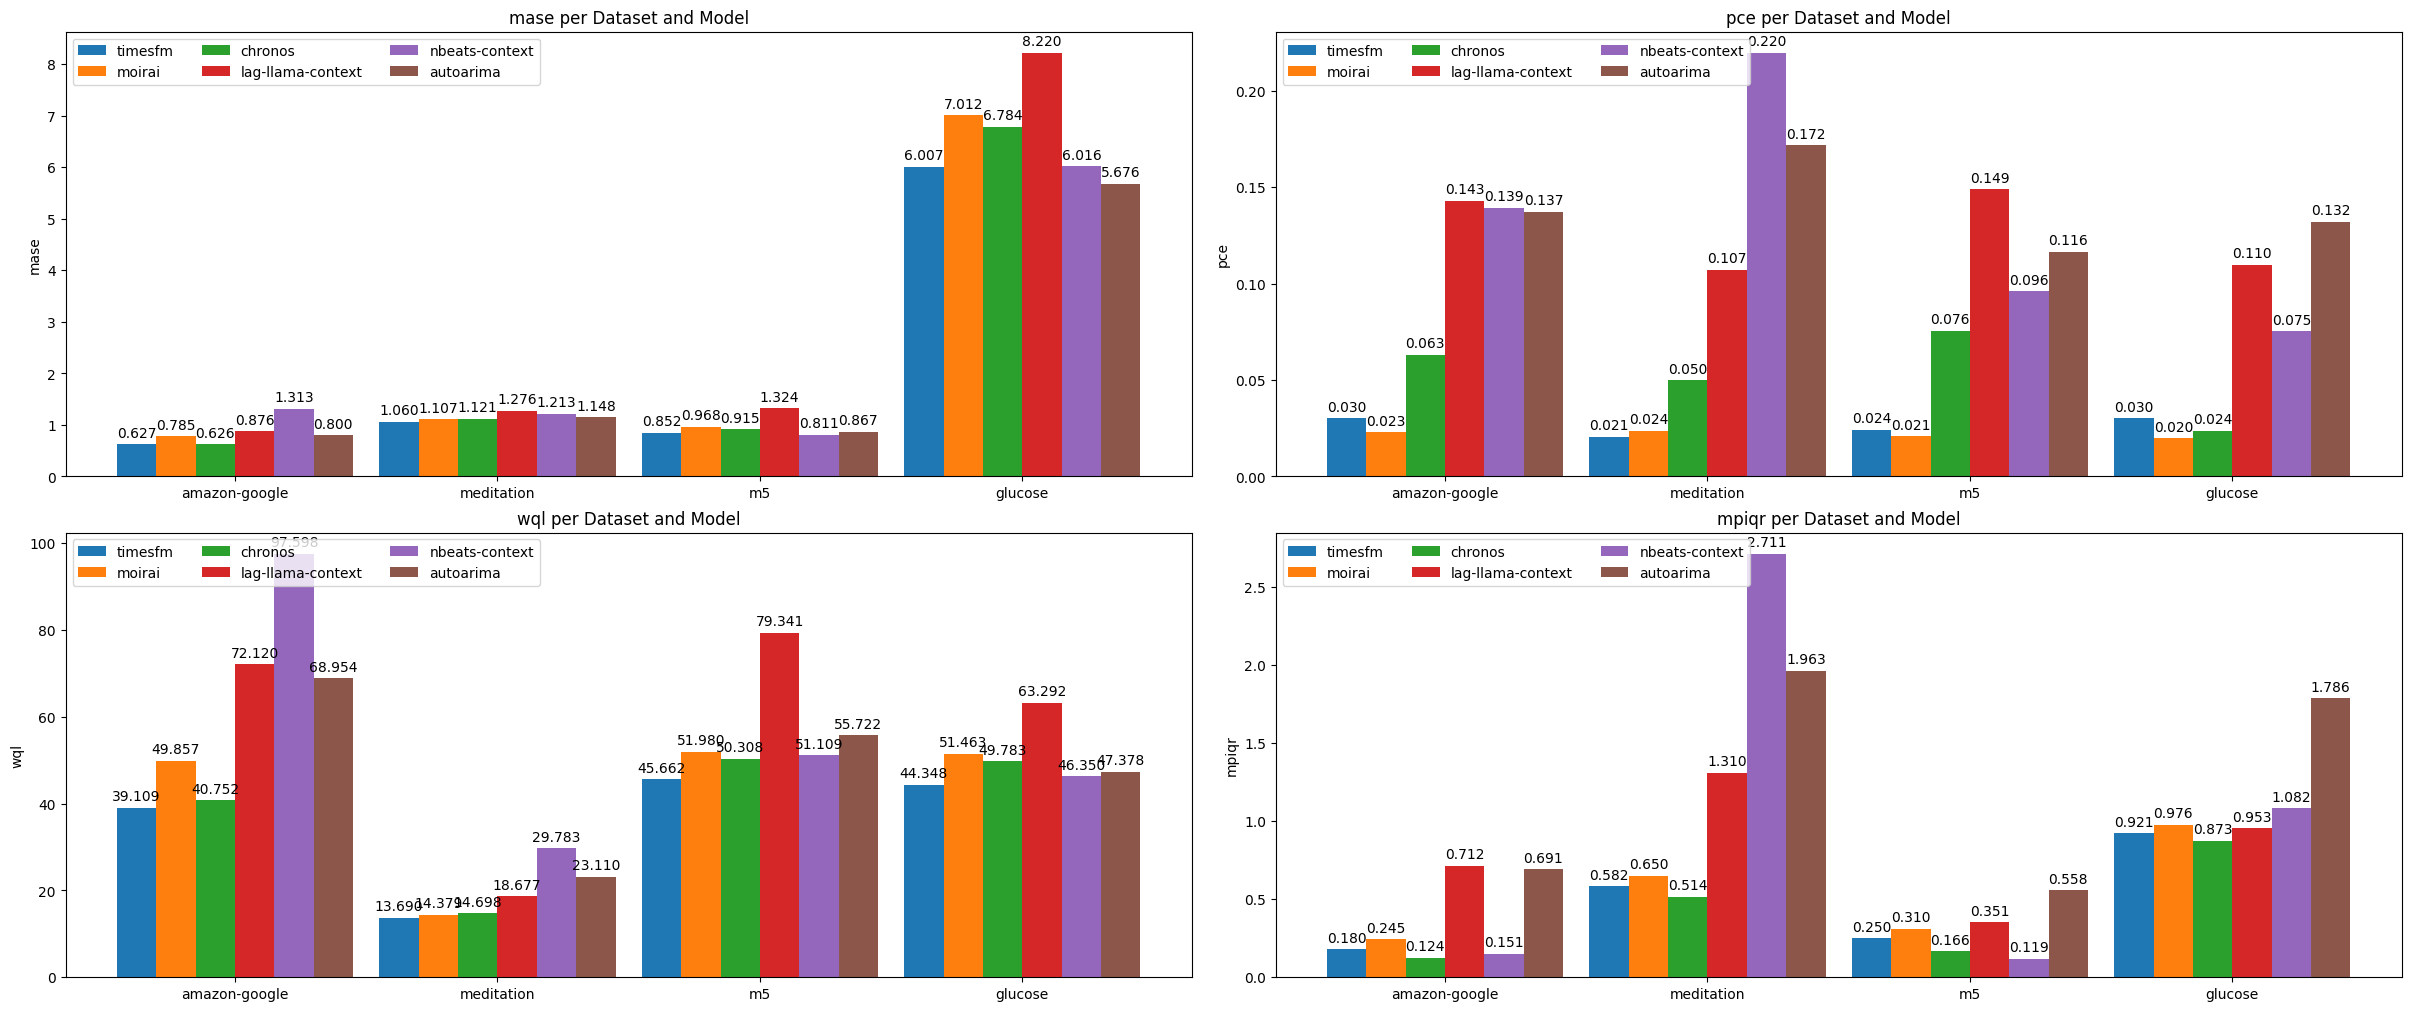

In [12]:
# Bar plot of metrics on different datasets
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(24,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, metric in enumerate(metrics):
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
plt.savefig('figures/bar_plot_all_metrics_per_dataset_model.png')
plt.show()


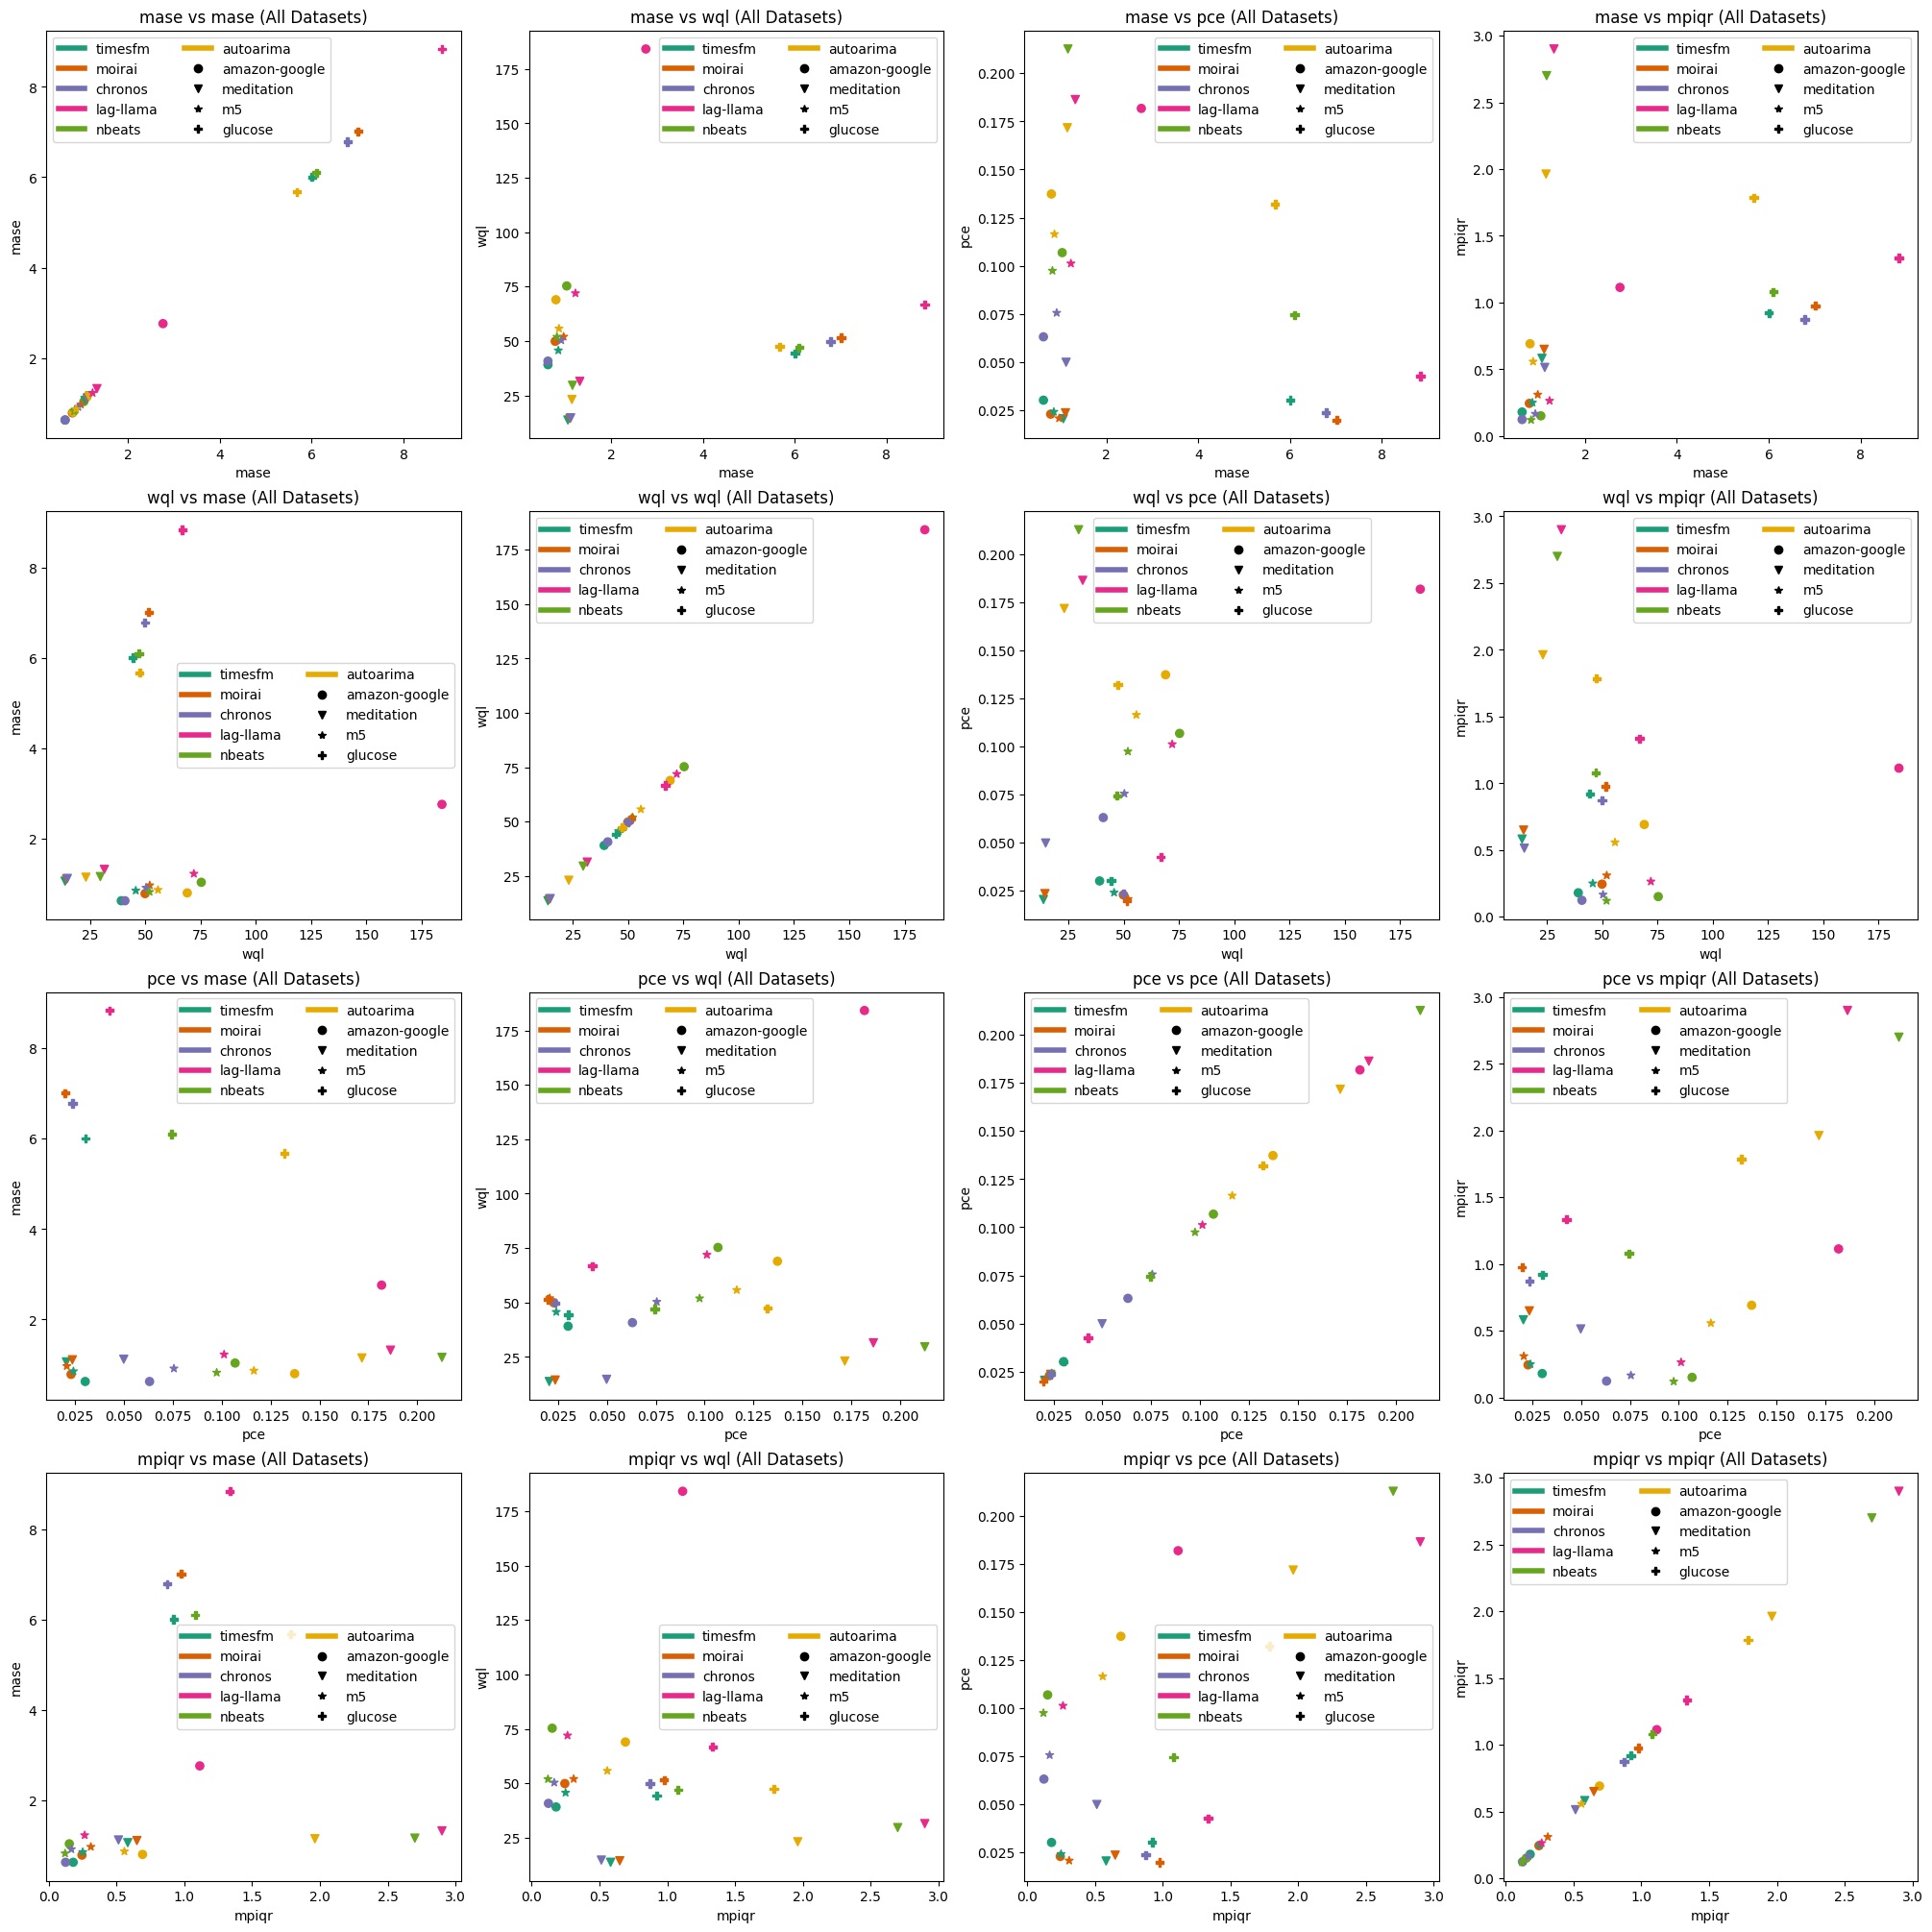

In [53]:
# Metric comparison scatter plots (all datasets)
fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))
wql_top = 0.03

custom_legend_dots = []
for model, model_color in zip(models, model_colors):
    custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=6, lw=0))


for i, metric_x in enumerate(metrics):
    for j, metric_y in enumerate(metrics):
        ax = axes[i, j]
        for marker, dataset in zip(dataset_markers, datasets):
            x = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_x), 'avg_result'].item() for model in models]
            y = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_y), 'avg_result'].item() for model in models]
            ax.scatter(x, y, c=model_colors, marker=marker)

        ax.set_ylabel(metric_y)
        ax.set_xlabel(metric_x)
        ax.set_title(f'{metric_x} vs {metric_y} (All Datasets)')
        ax.legend(custom_legend_dots, [*models, *datasets], ncols=2)
plt.savefig('figures/scatter_plot_metrics_per_metric.png')
plt.show()
        

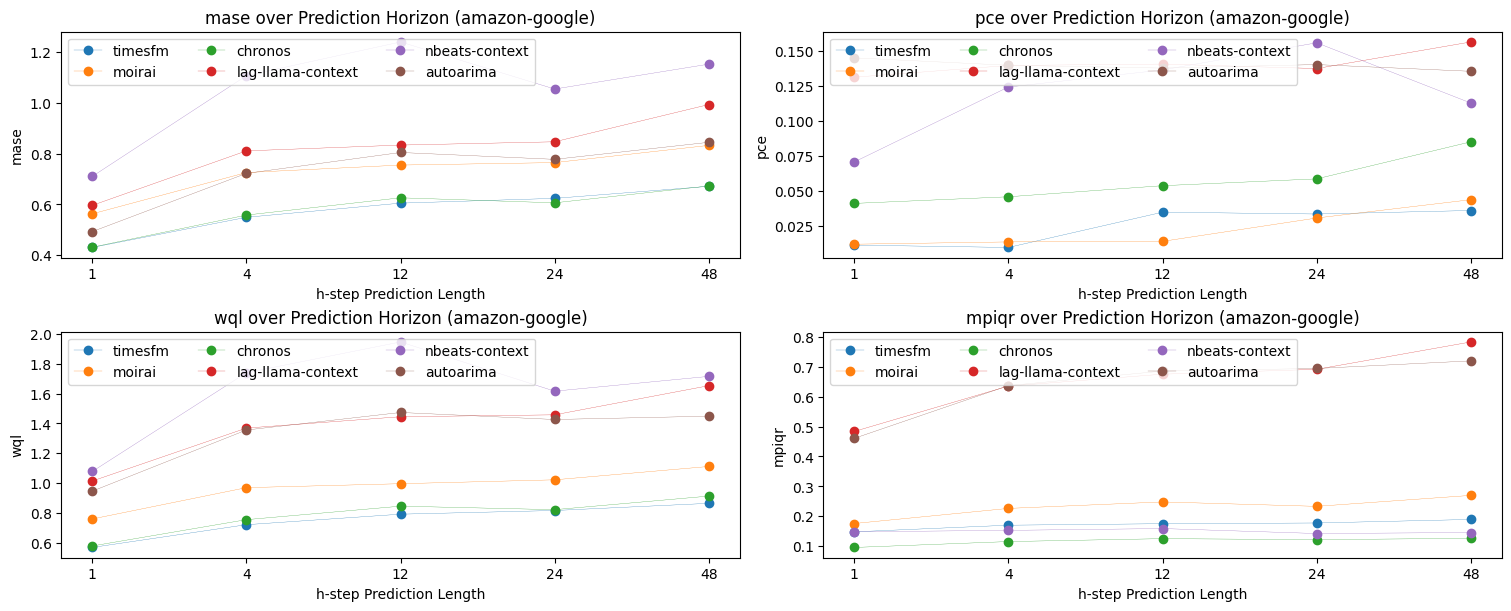

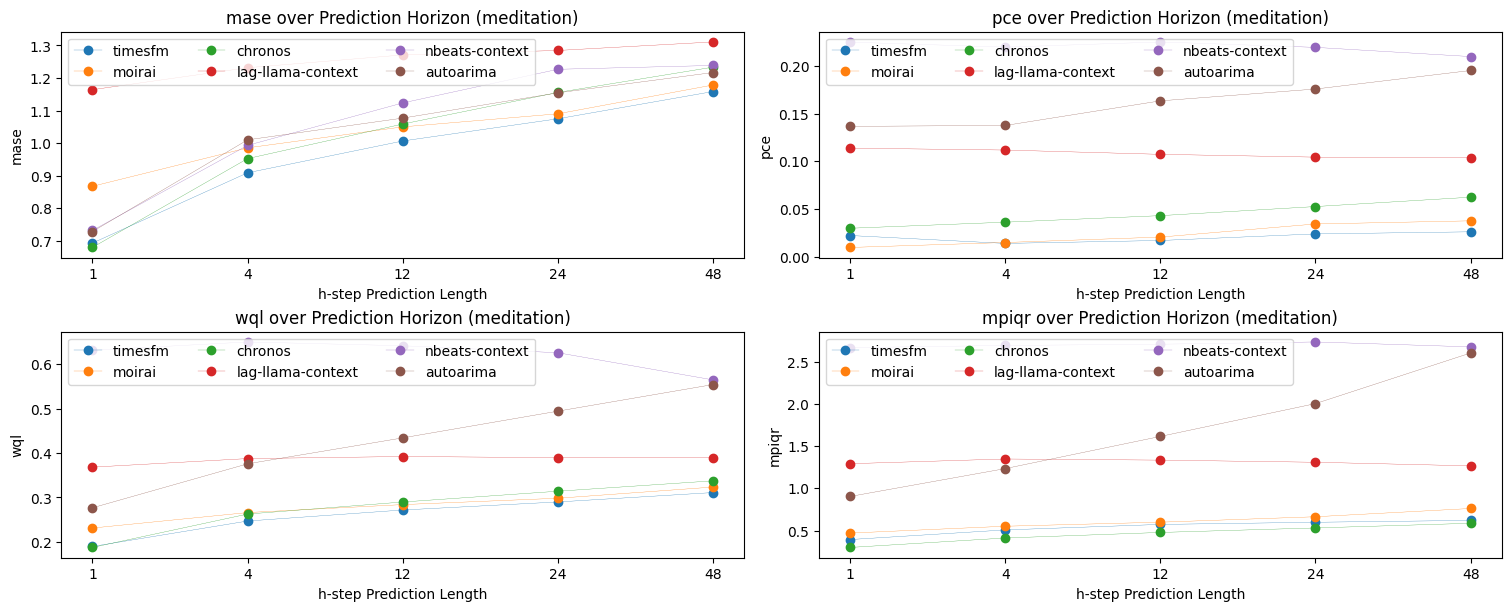

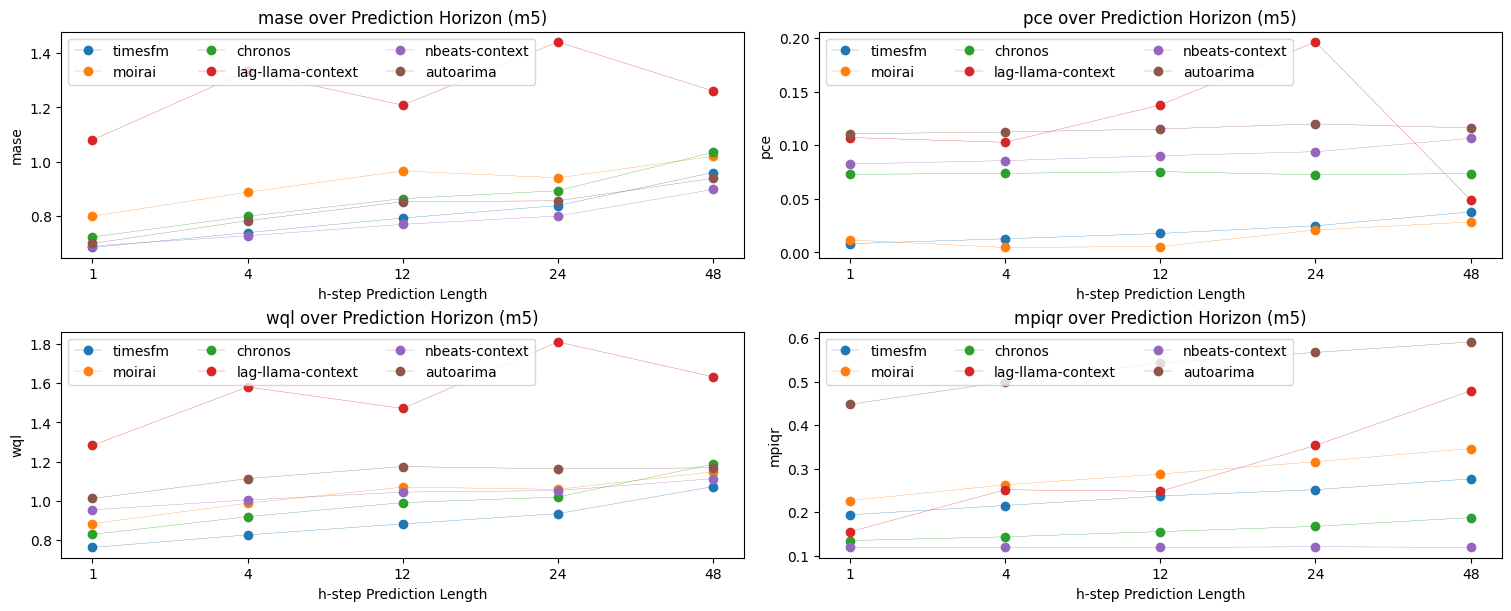

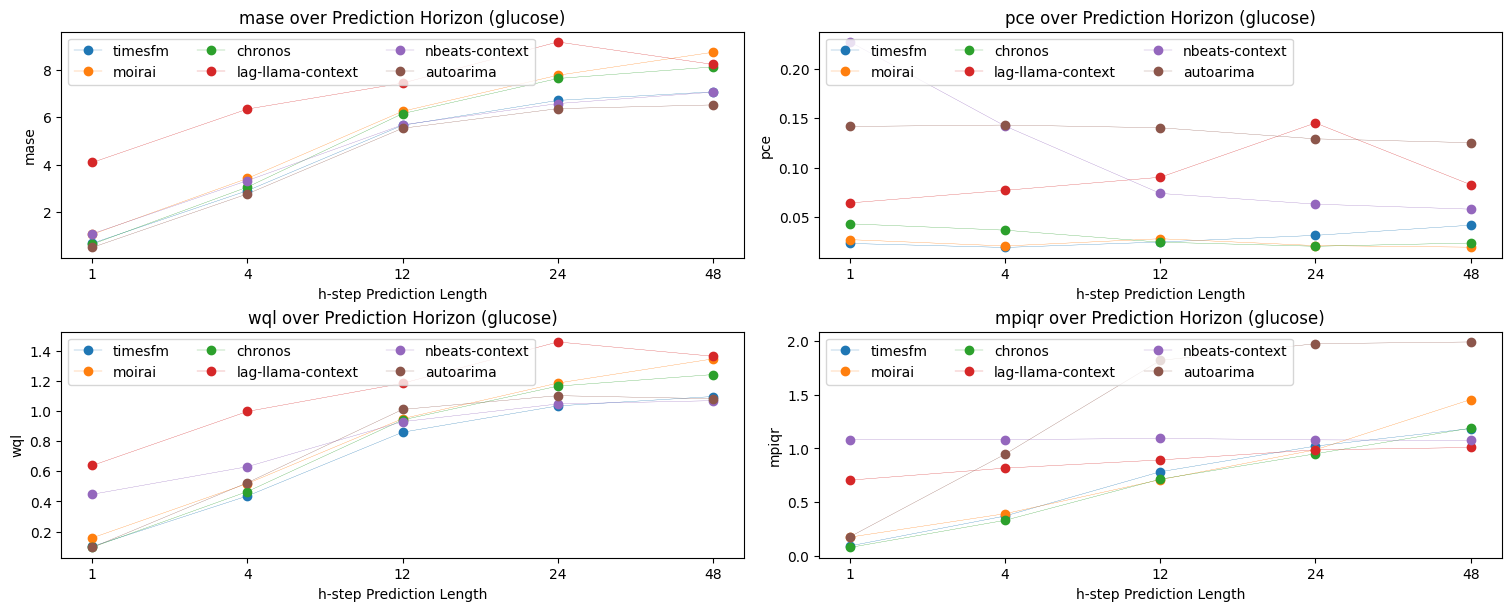

In [13]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

for dataset in datasets:
    fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
    for i, metric in enumerate(metrics):
        ax = axes[i%2, i//2]
        for model in models:
            y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), pred_horizon].to_numpy().flatten()
            ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

        # Add some text for labels, title and custom x-axis tick labels, etc.   
        ax.set_ylabel(metric)
        ax.set_xlabel("h-step Prediction Length")
        ax.set_title(f'{metric} over Prediction Horizon ({dataset})')
        ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
        ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/line_plot_all_metrics_per_pred_len_{dataset}.png')
    plt.show()

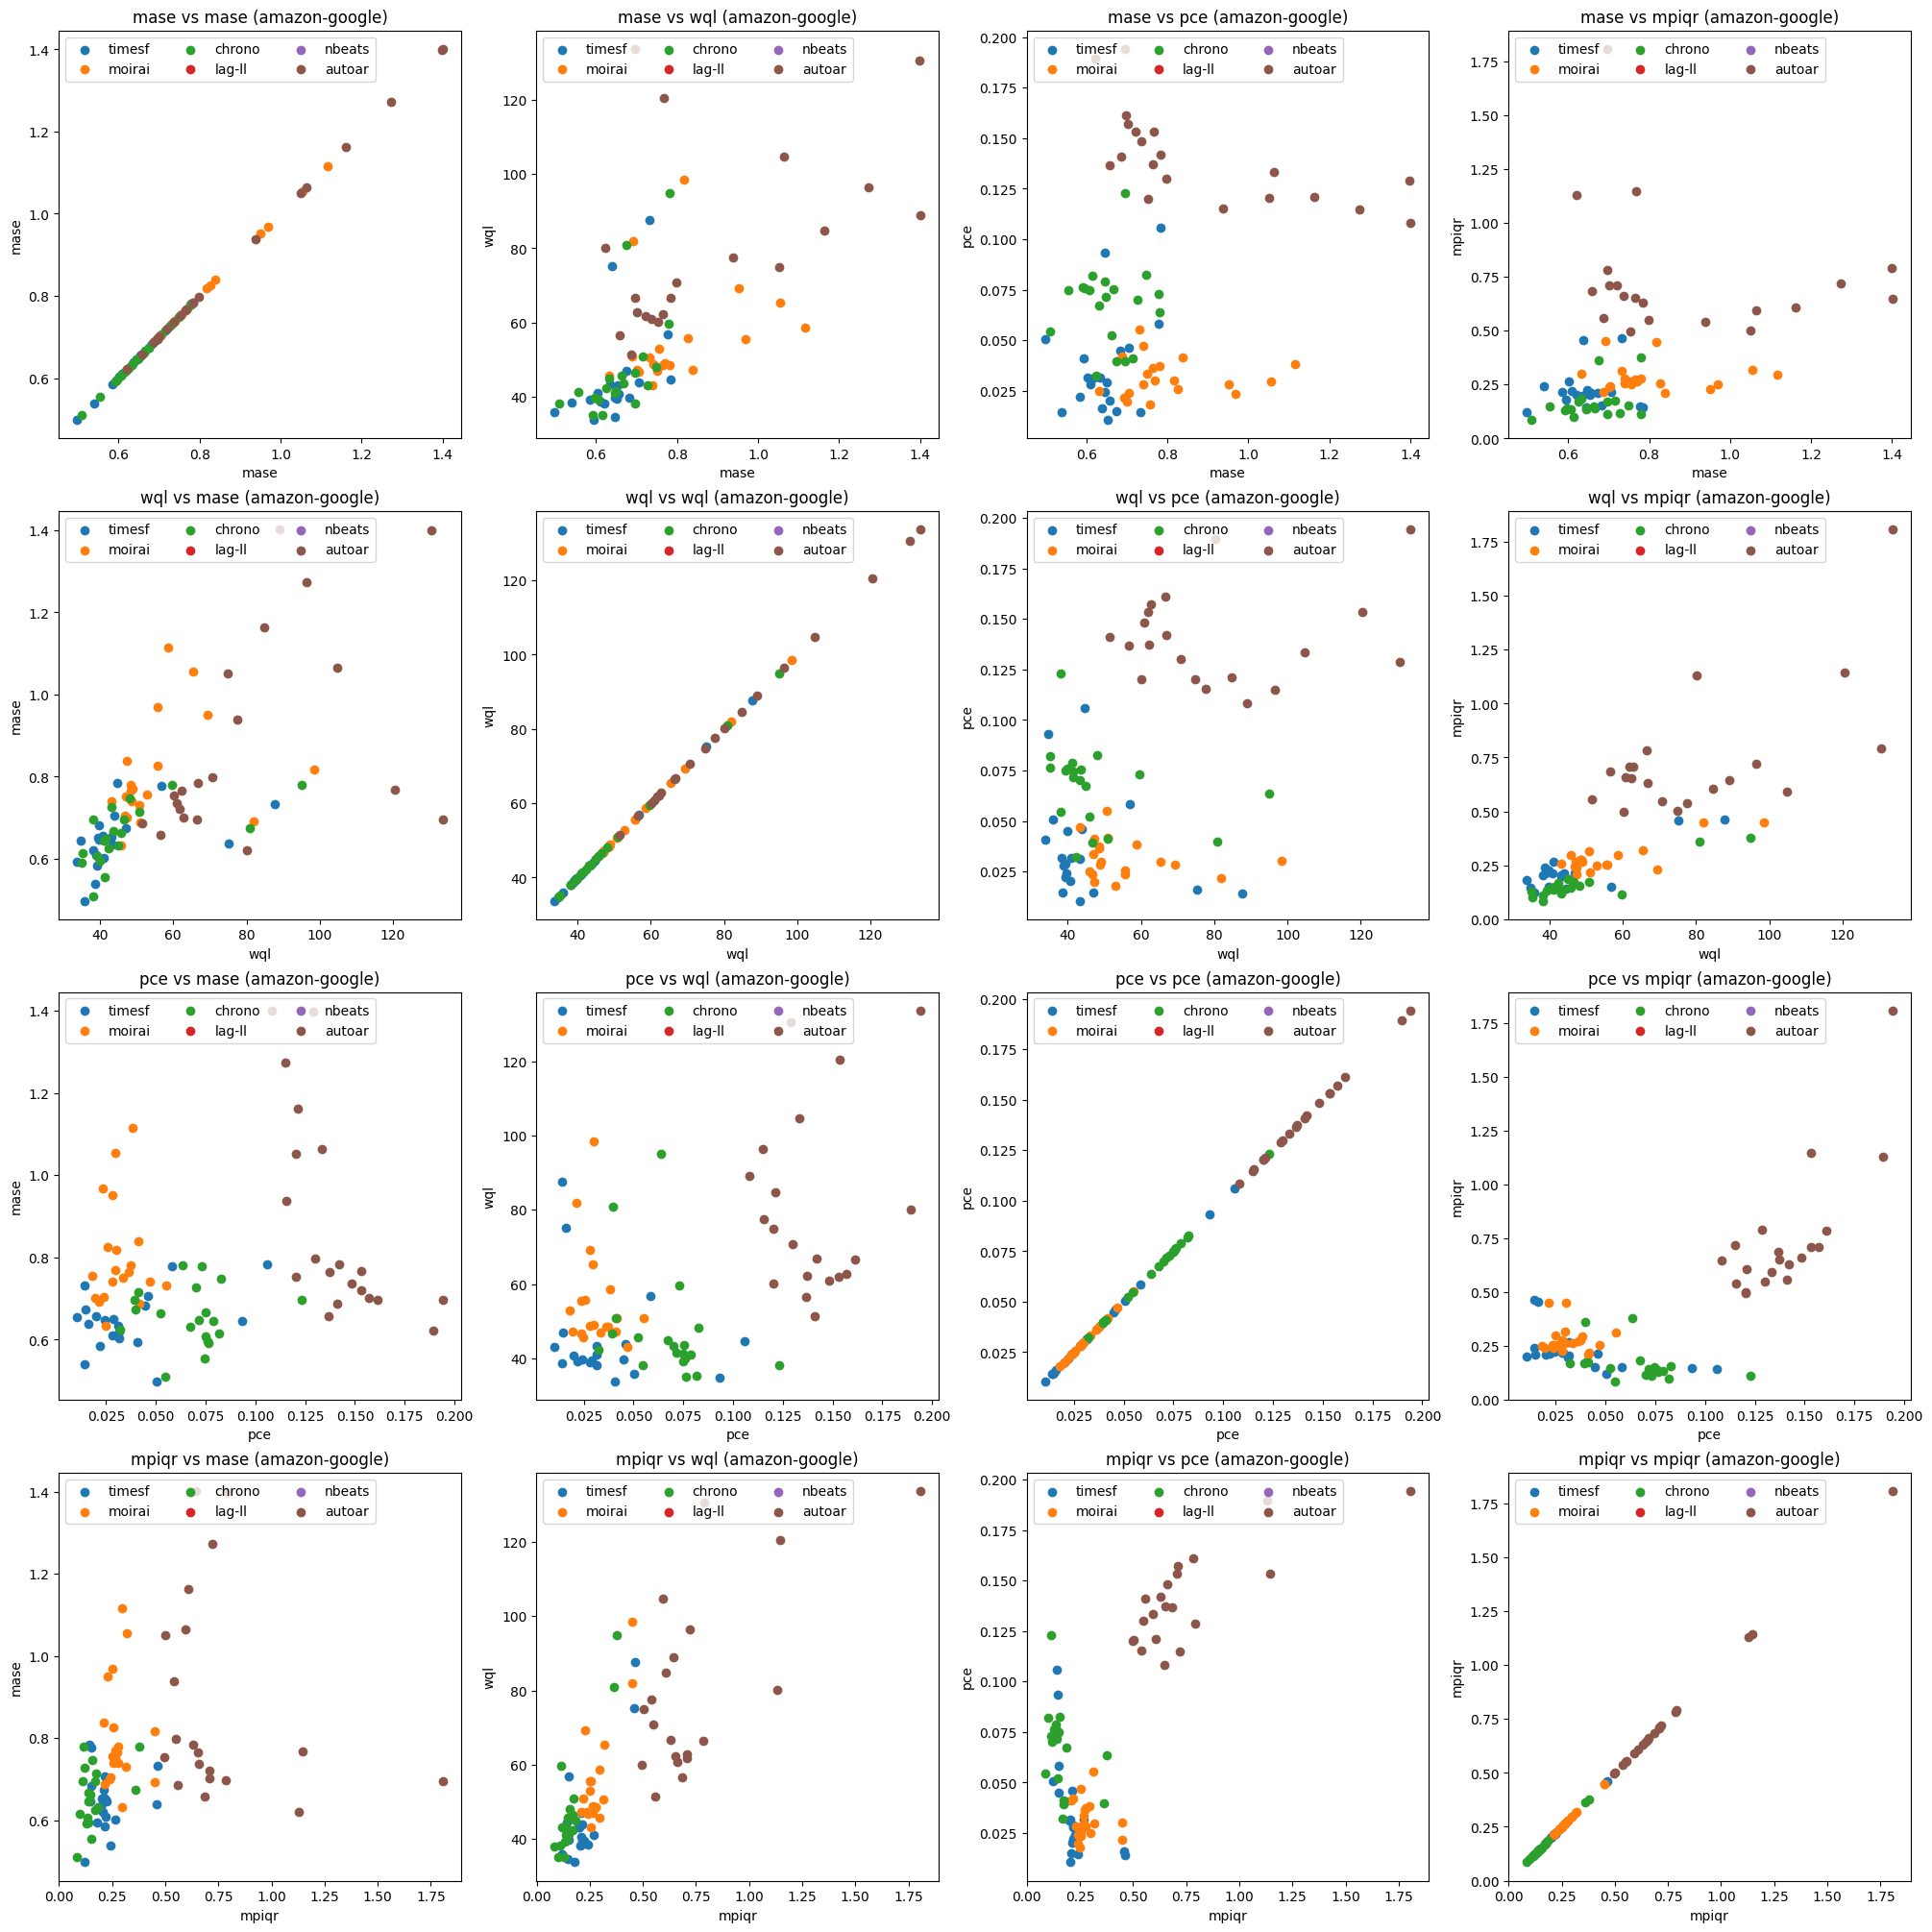

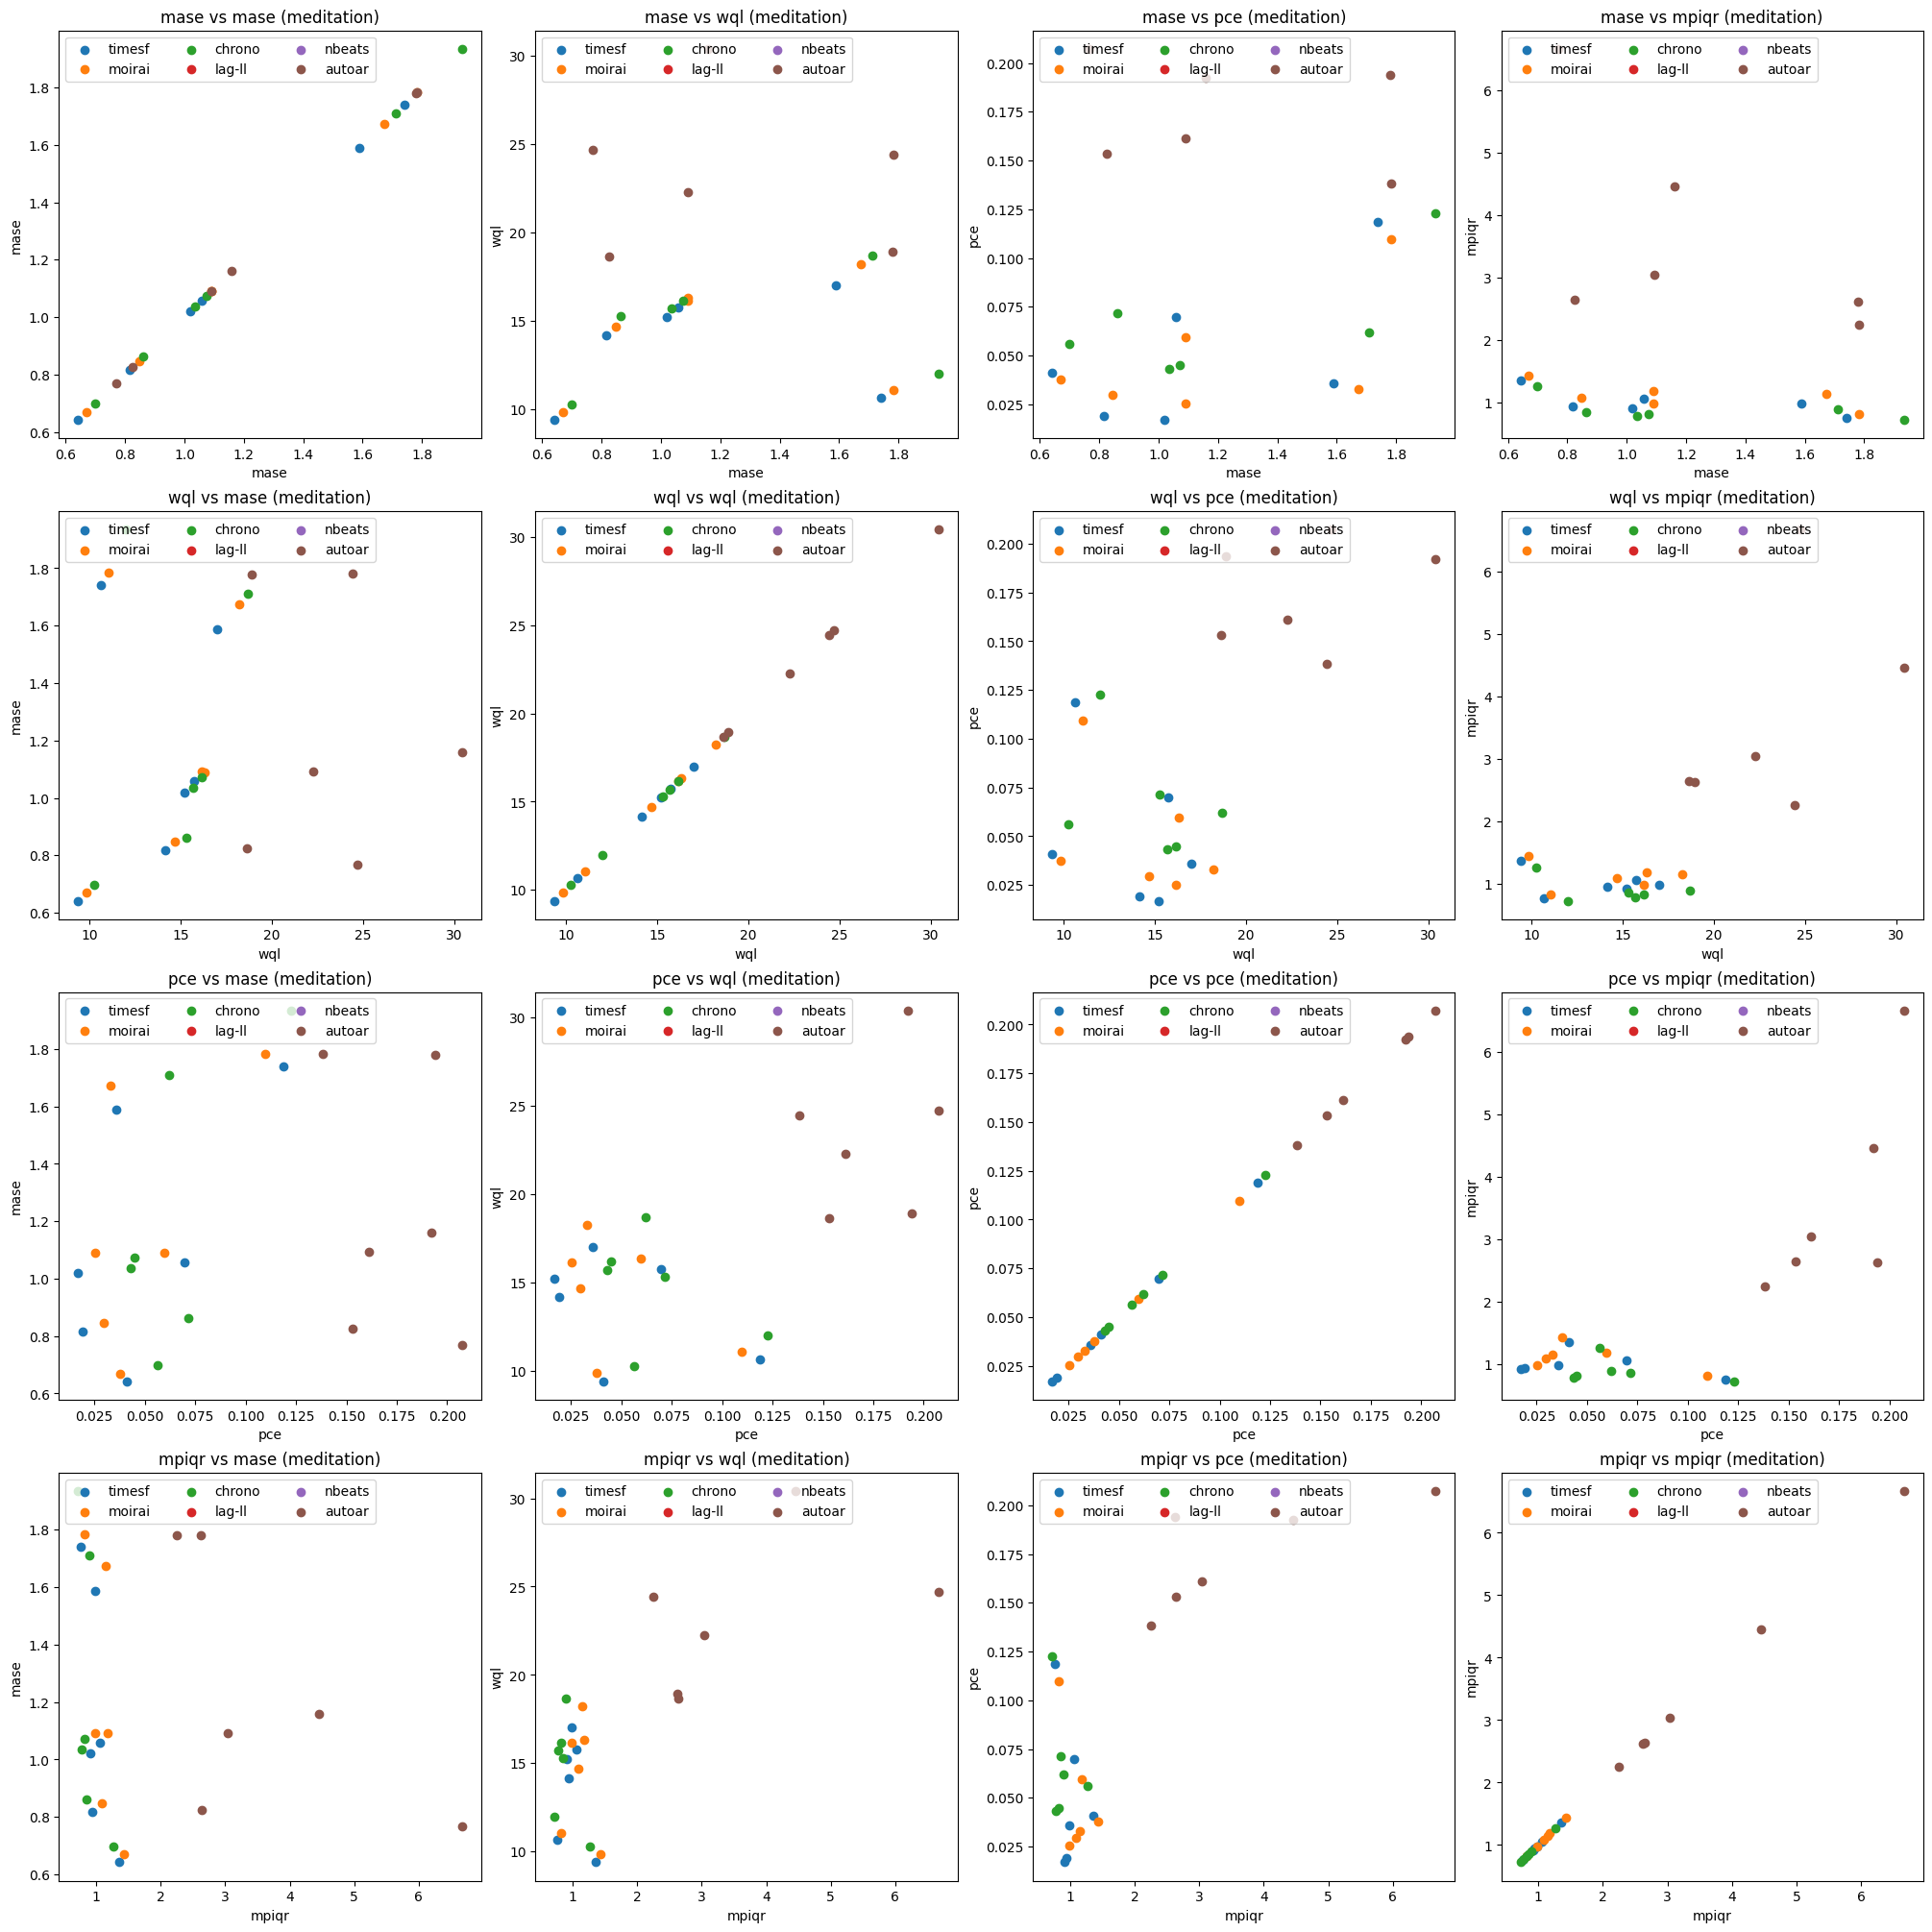

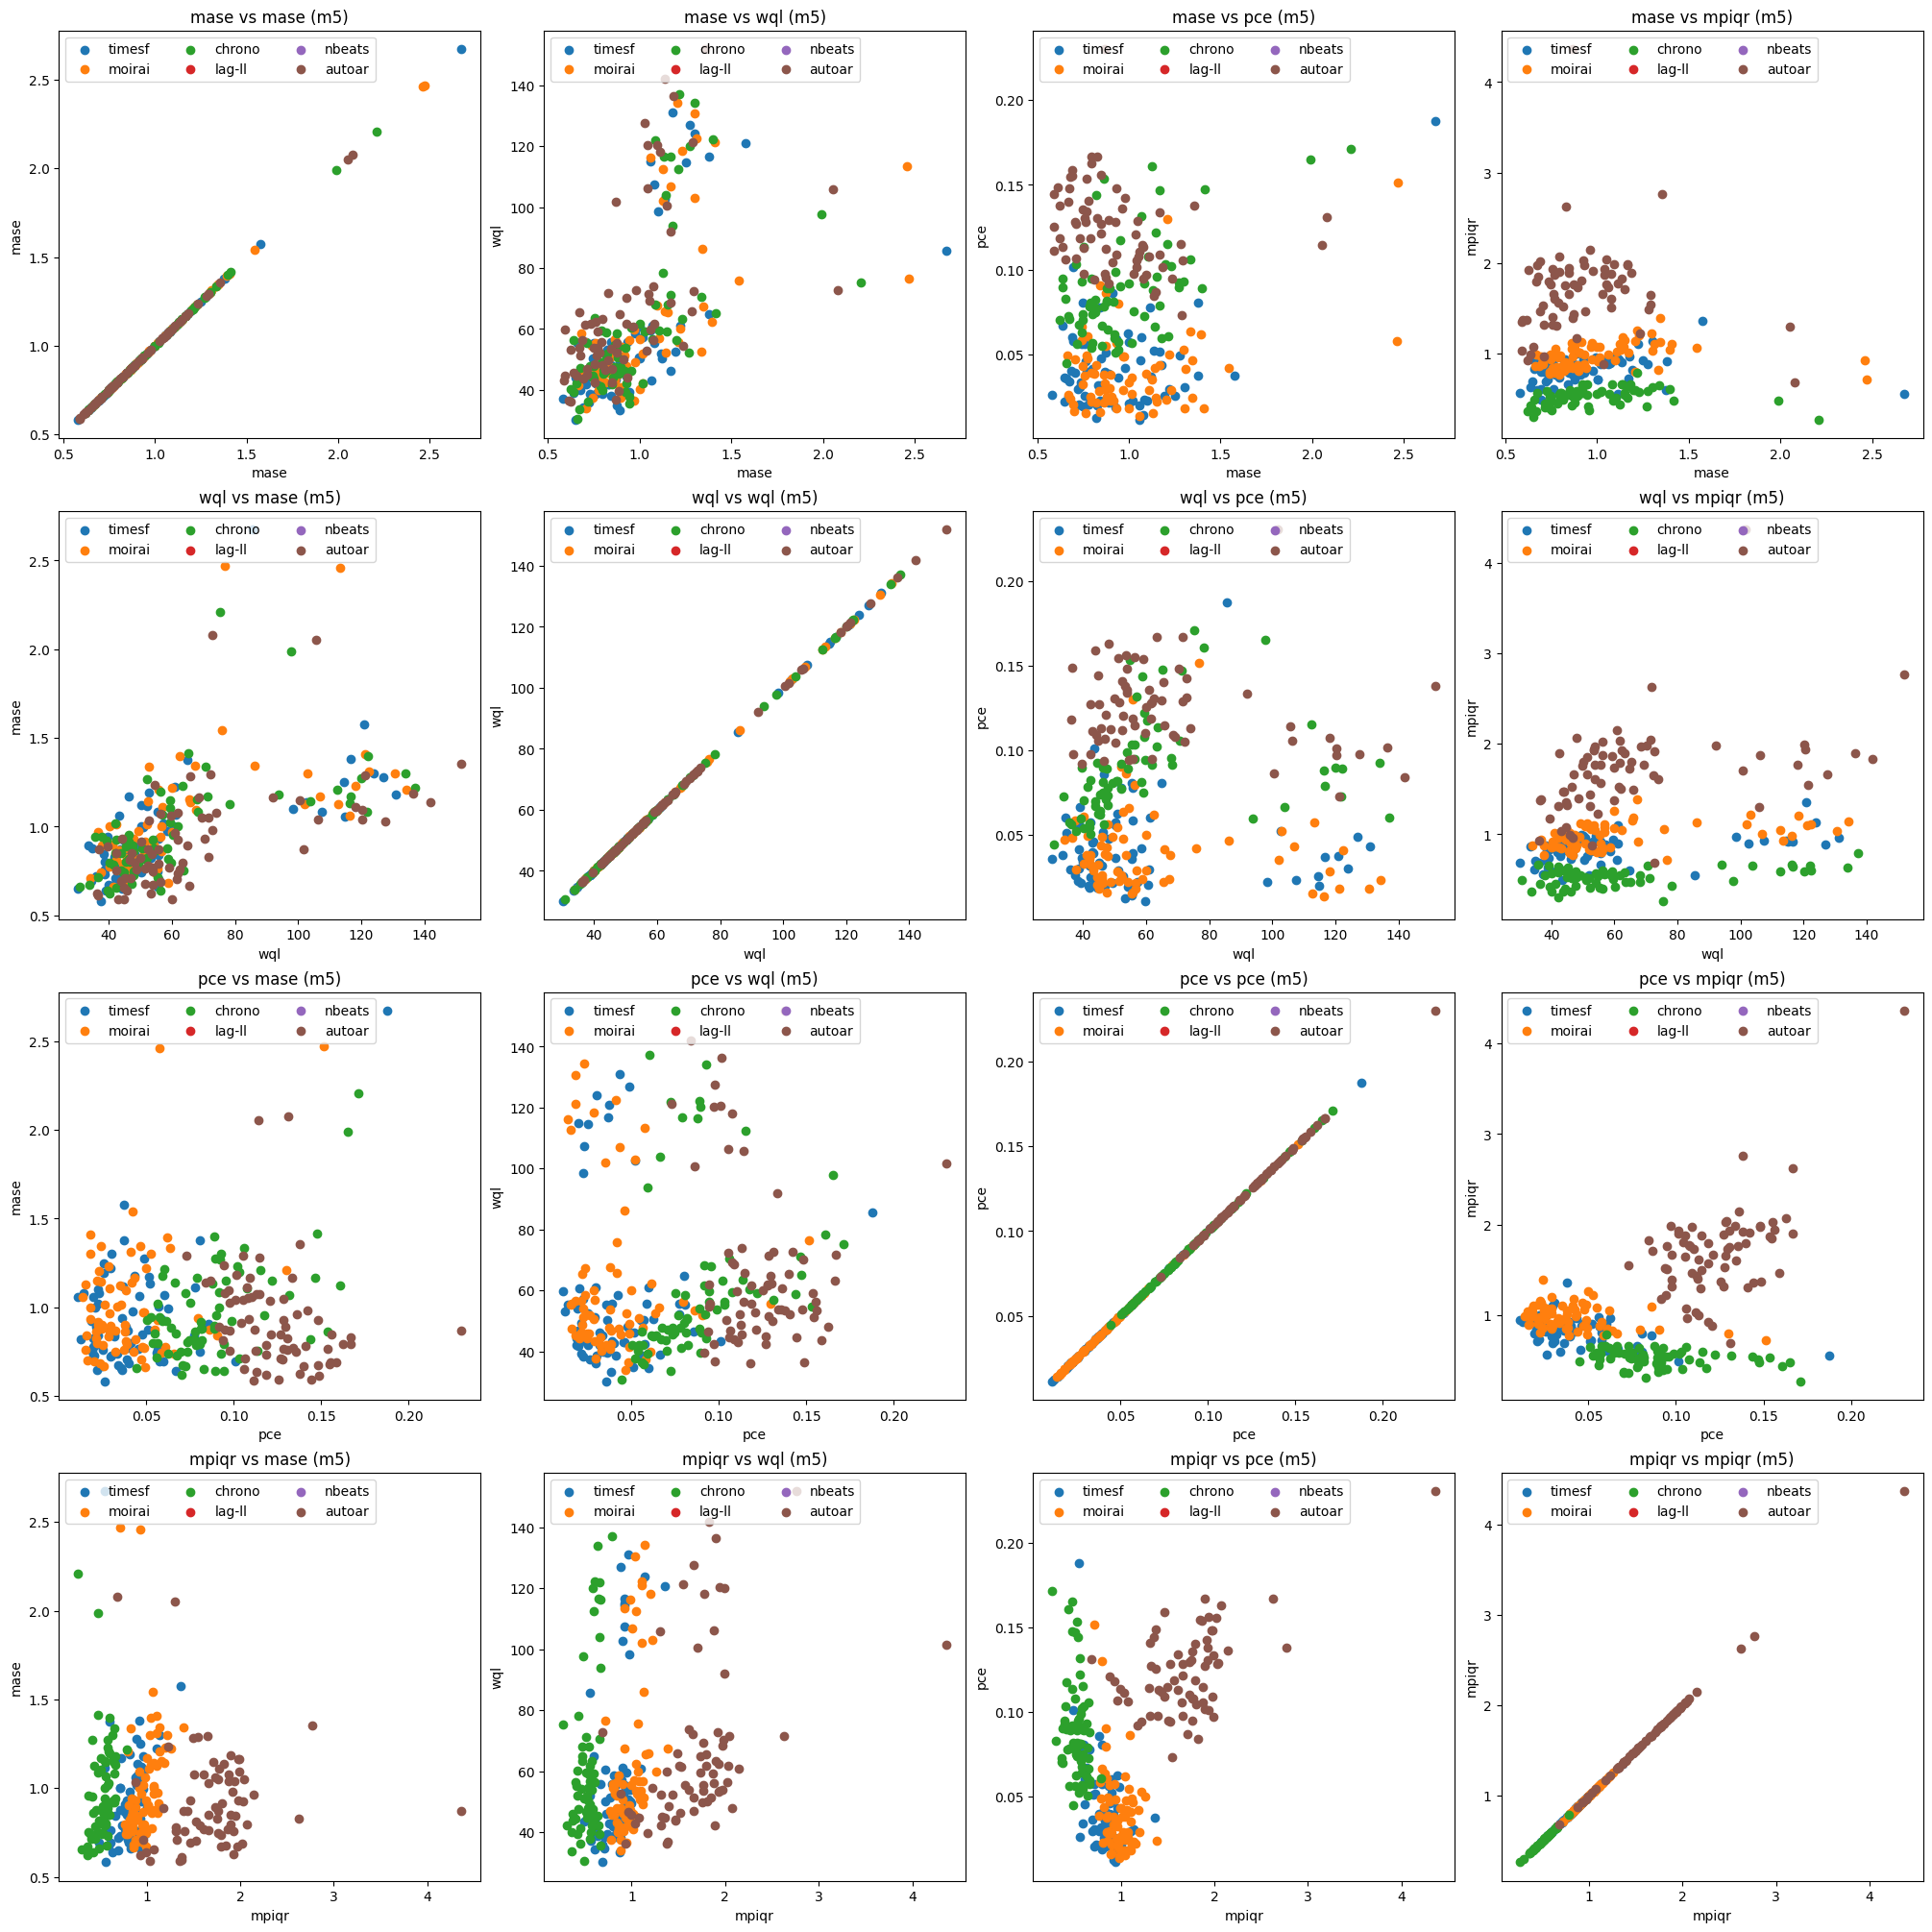

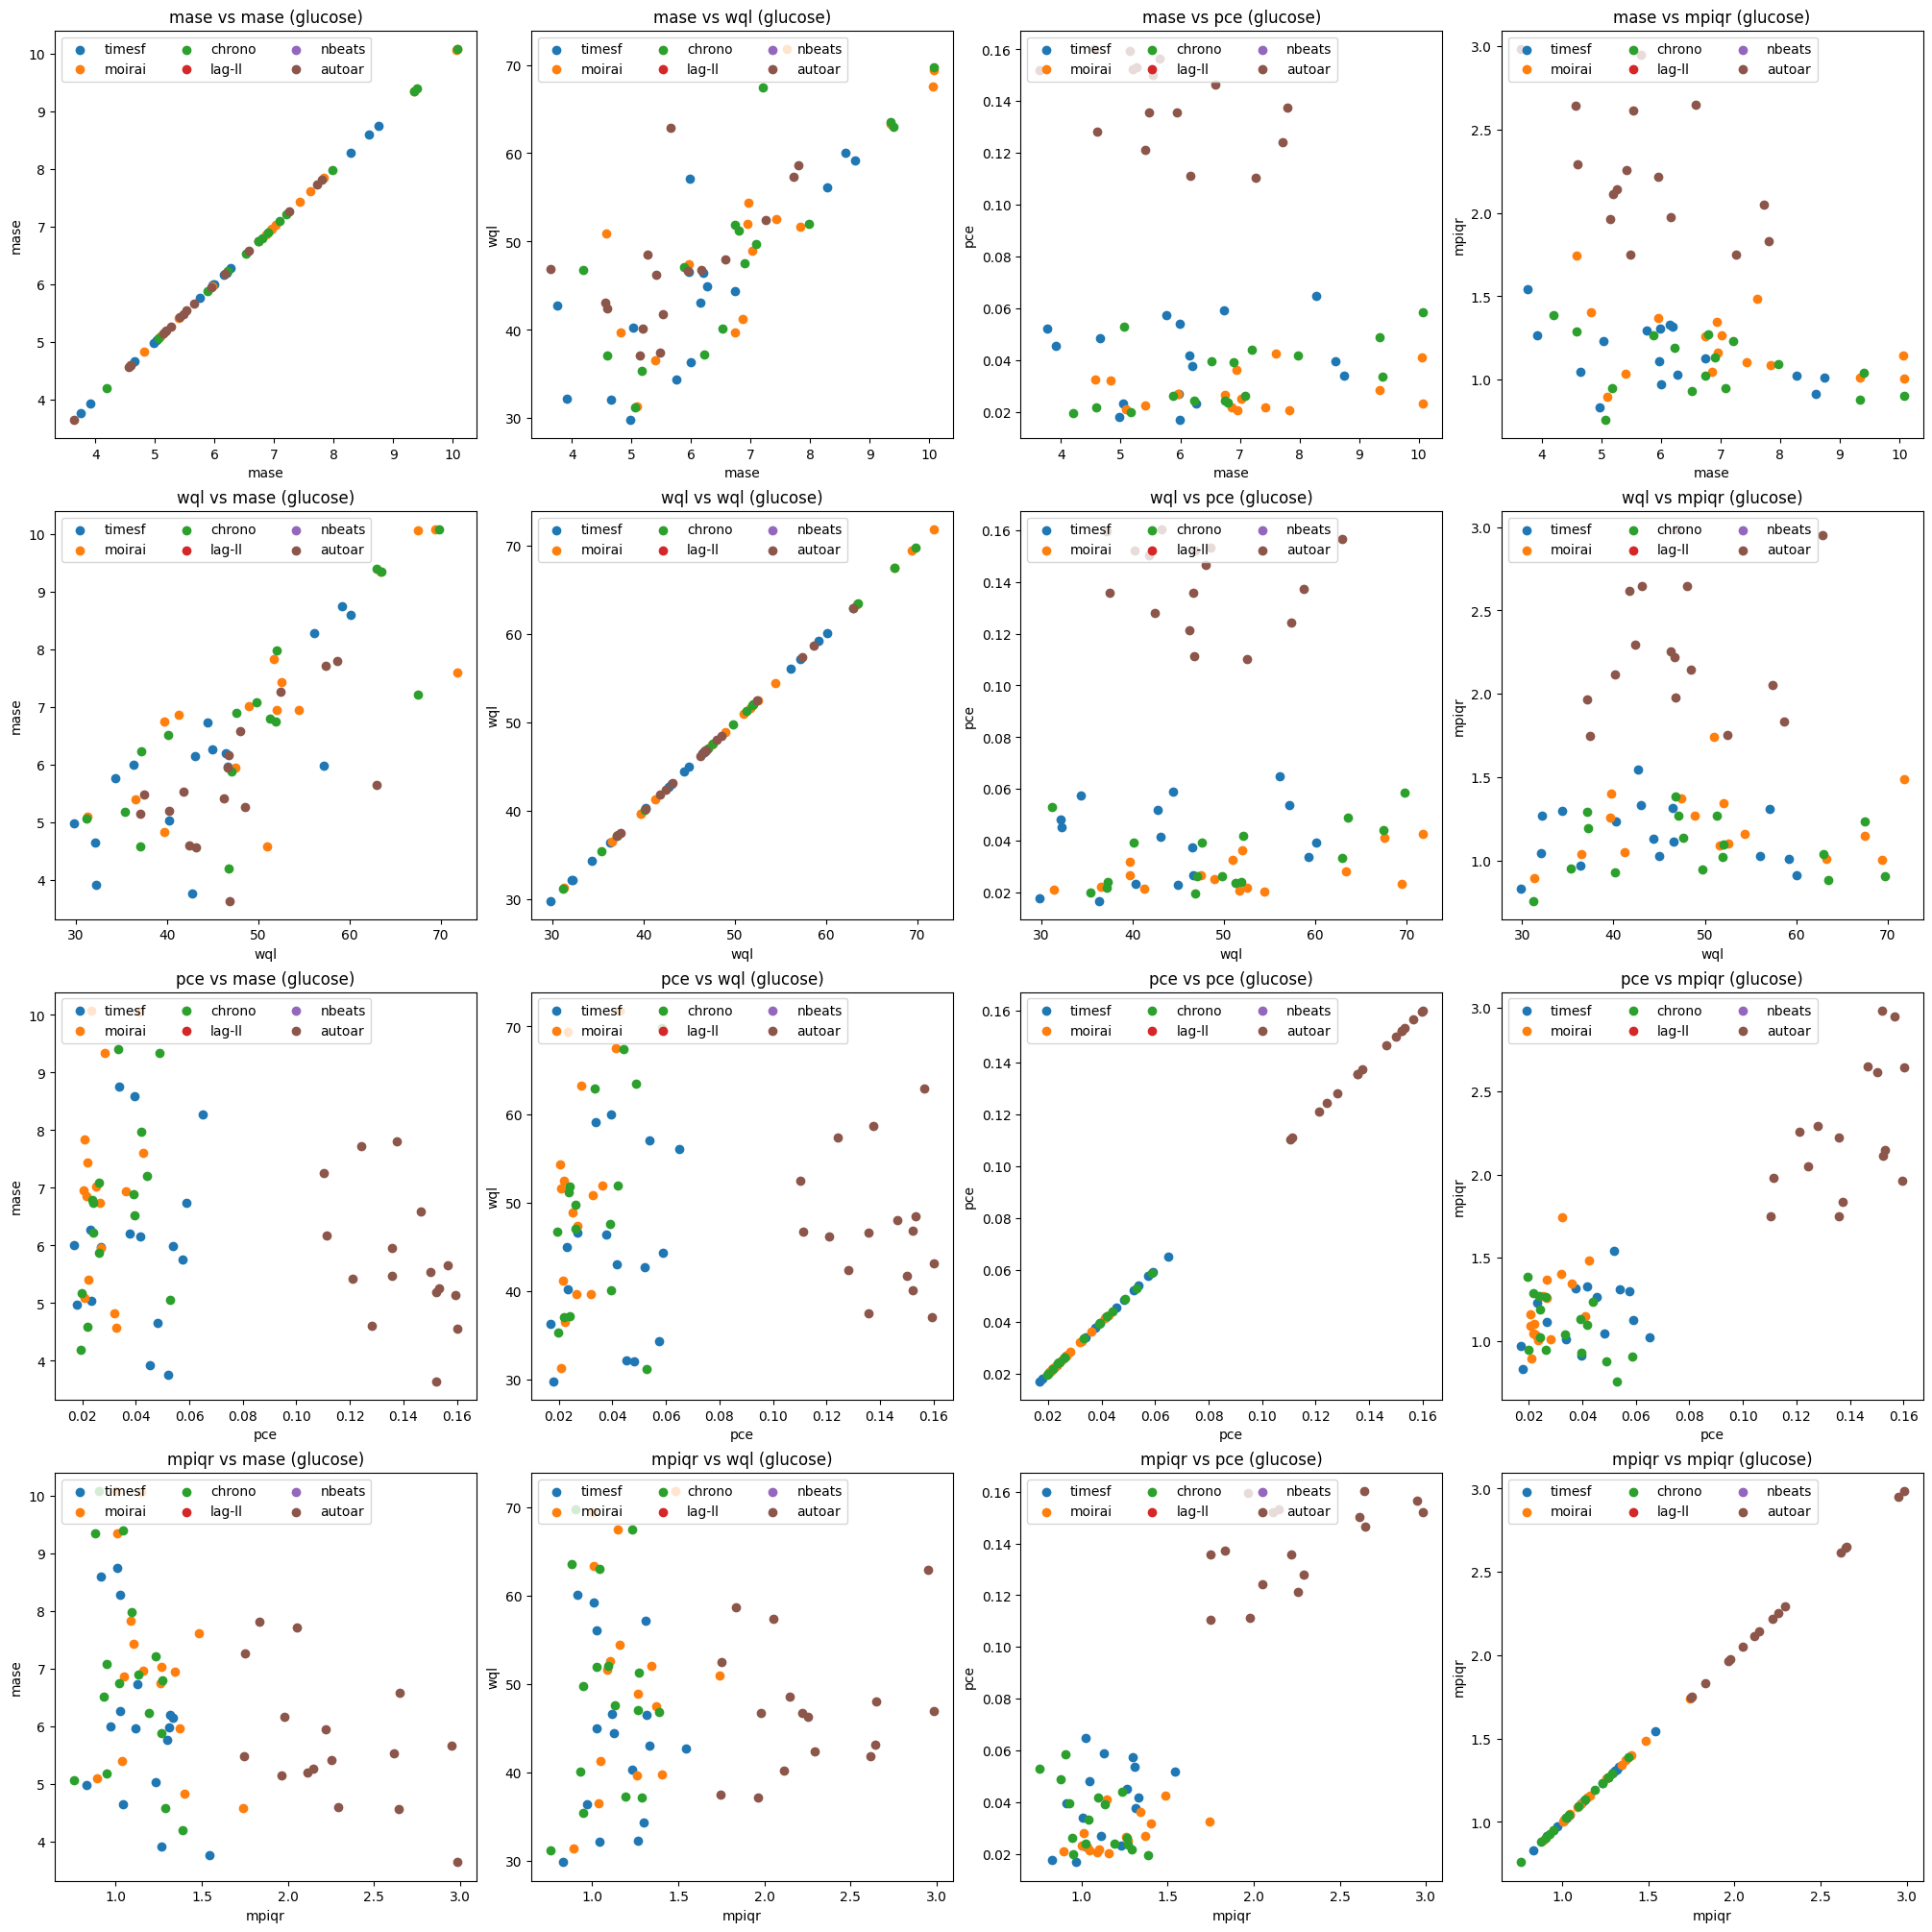

In [15]:
# Metric comparison scatter plots (individual timeseries)
for dataset in datasets:
    fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))

    for i, metric_x in enumerate(metrics):
        for j, metric_y in enumerate(metrics):
            ax = axes[i, j]
            for model in models:
                time_series_ind = [str(i) for i in range(1,num_timeseries[dataset]+1)]
                x = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_x), time_series_ind]
                y = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_y), time_series_ind]
                ax.scatter(x, y, label=model[:6])

            ax.set_ylabel(metric_y)
            ax.set_xlabel(metric_x)
            ax.set_title(f'{metric_x} vs {metric_y} ({dataset})')
            ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/scatter_plot_all_metrics_per_metrics_timeseries_{dataset}.png')
    plt.show()

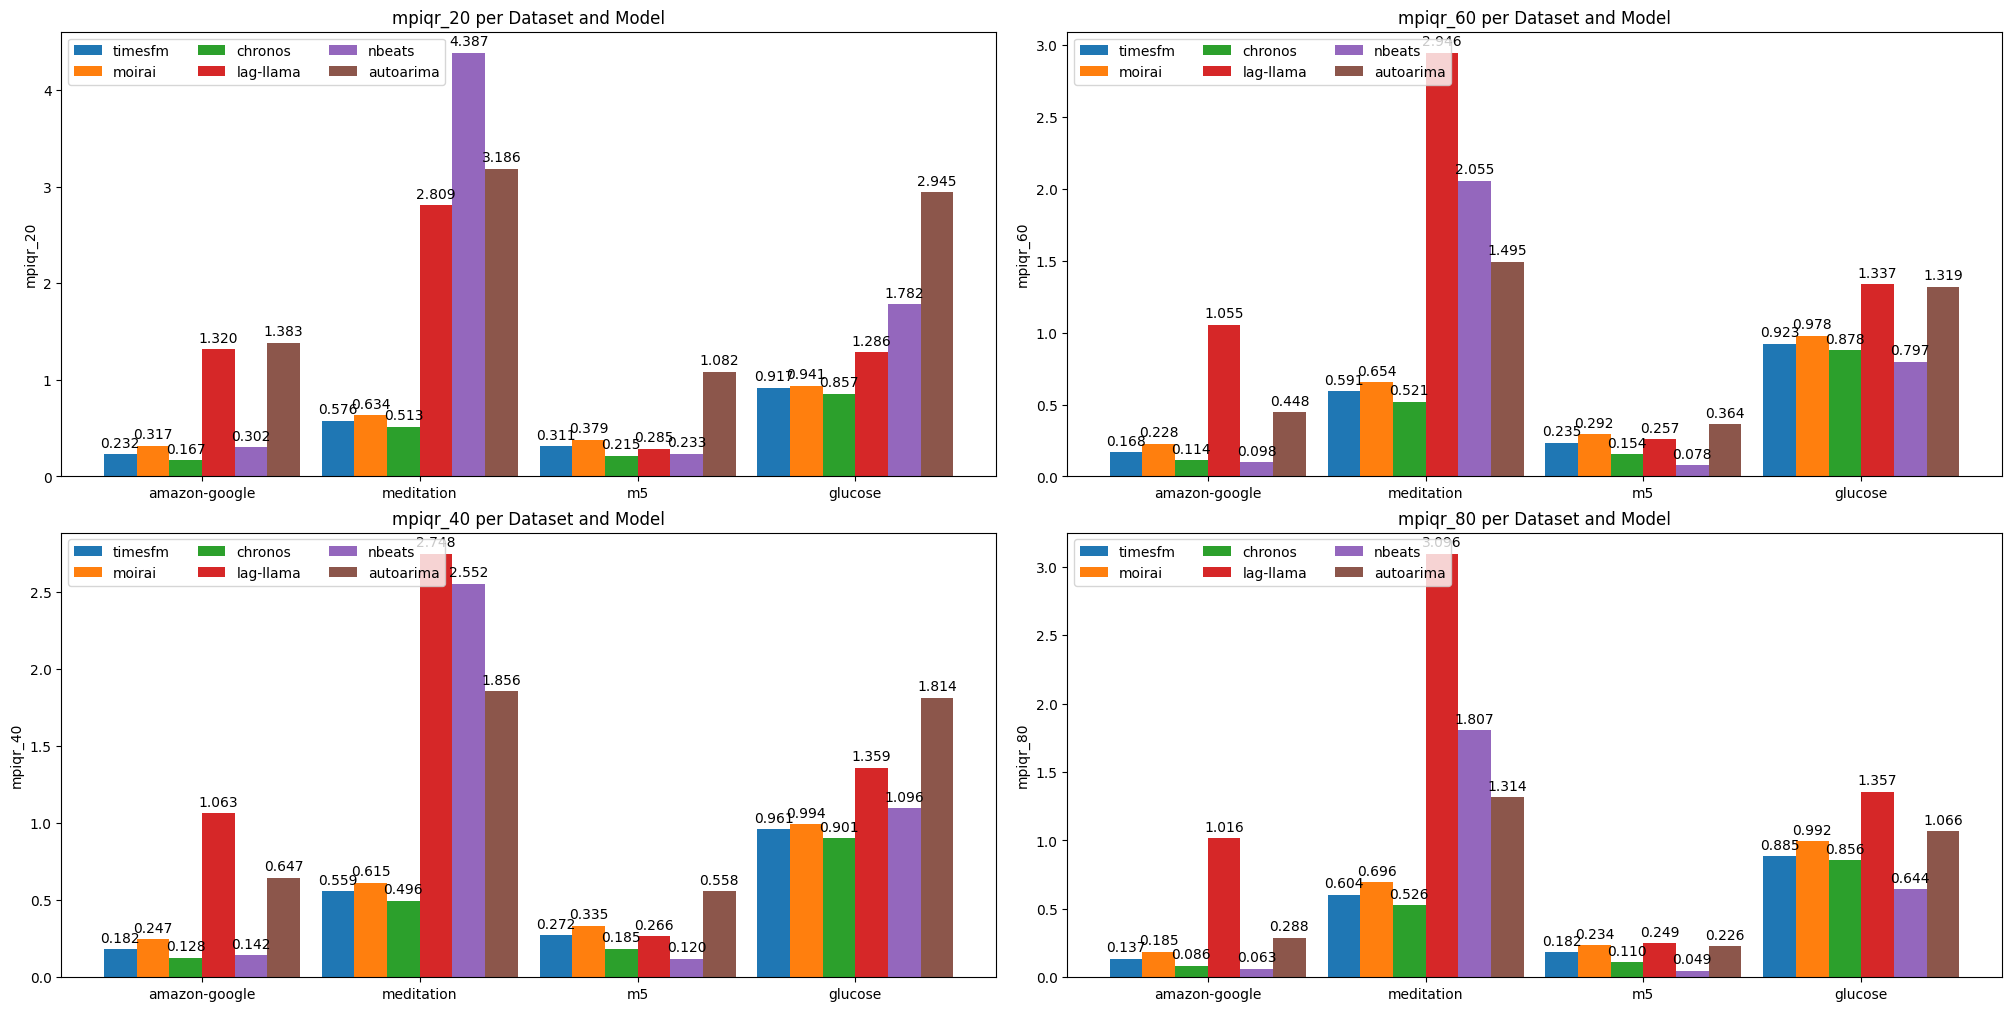

In [43]:
# Bar plot of mpiqr on different datasets
fig, axes = plt.subplots(2,2,layout='constrained', figsize=(20,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, confidence in enumerate(confidences):
    metric = f'mpiqr_{confidence}'
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax.set_ylabel(f"{metric}")
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
# plt.savefig('figures/bar_plot_mean_scaled_interval_size_per_dataset_model.png')
plt.show()

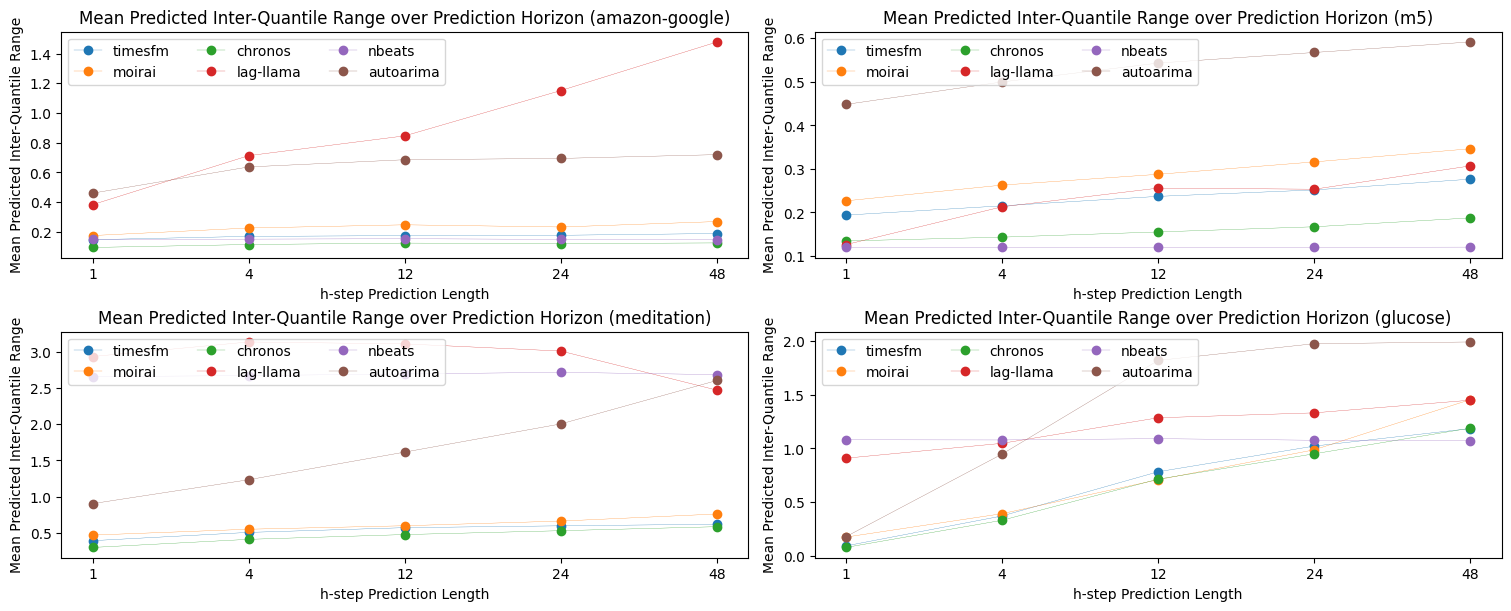

In [56]:
# Line Plot Mean Predicted Inter-Quantile Range over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    for model in models:
        y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']=='mpiqr'), pred_horizon].to_numpy().flatten()
        ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

    # Add some text for labels, title and custom x-axis tick labels, etc.   
    ax.set_ylabel("Mean Predicted Inter-Quantile Range")
    ax.set_xlabel("h-step Prediction Length")
    ax.set_title(f'Mean Predicted Inter-Quantile Range over Prediction Horizon ({dataset})')
    ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
    ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/line_plot_mpiqr_per_pred_len.png')
plt.show()

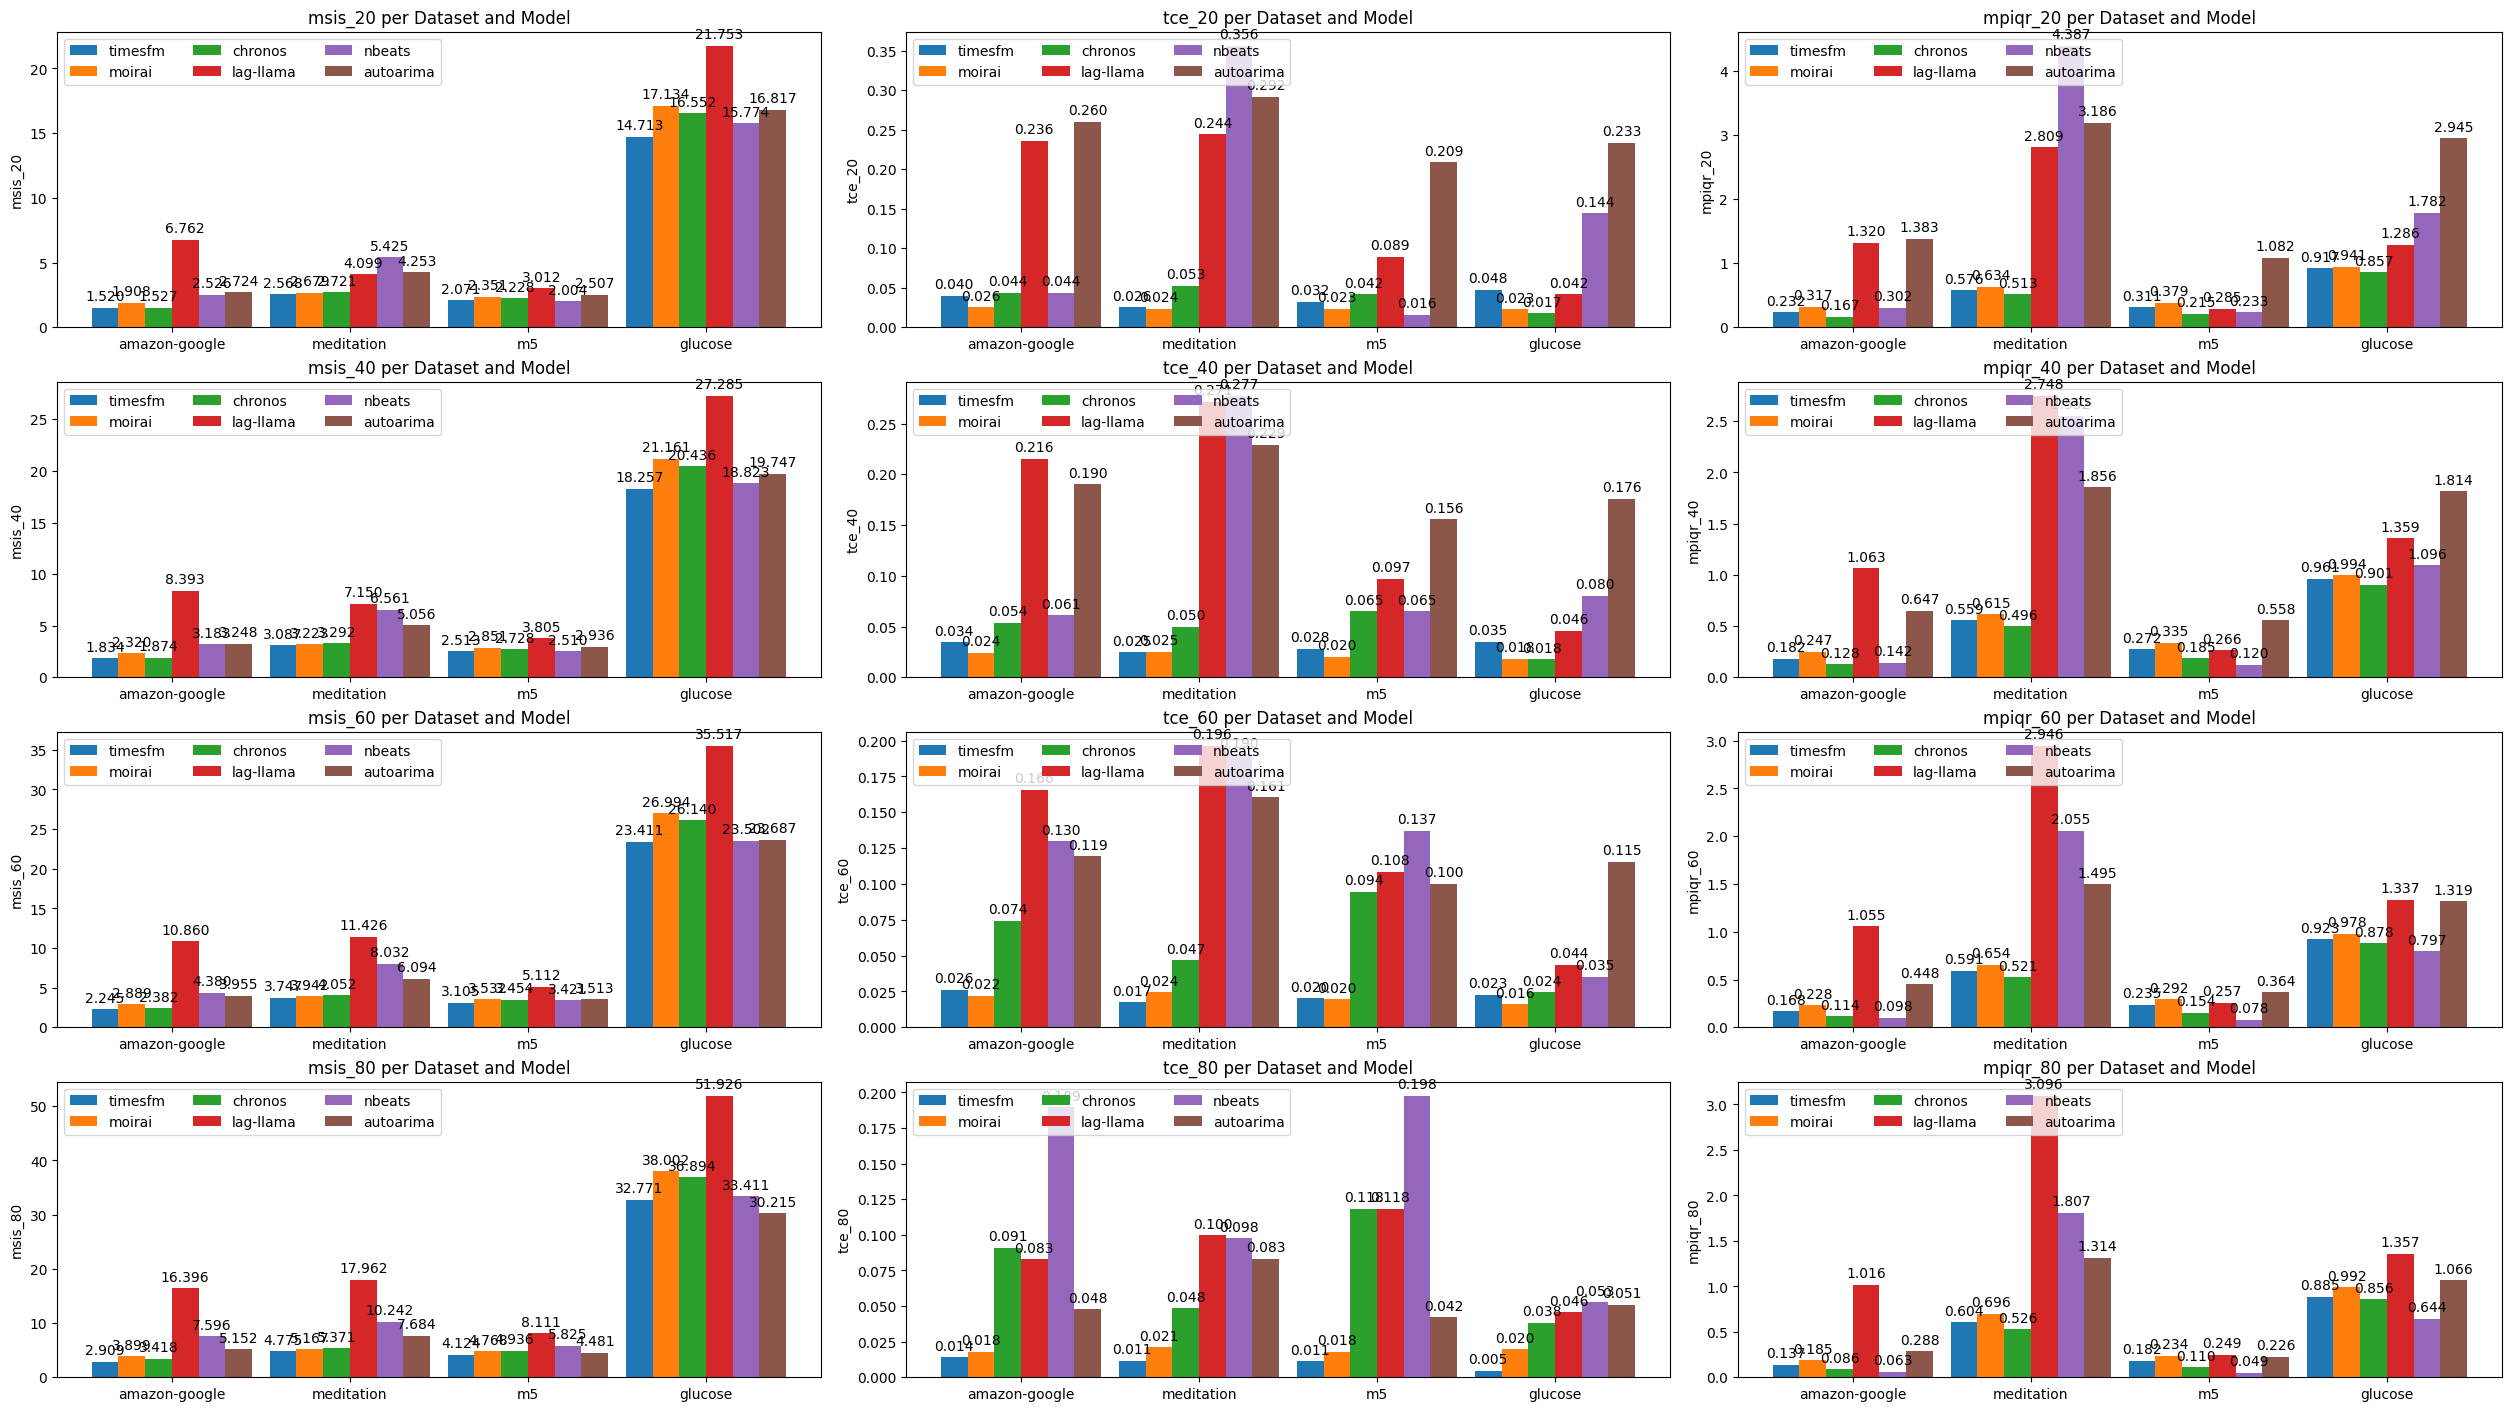

In [59]:
# Confidence of MSIS TCE MSIW
fig, axes = plt.subplots(4, 3, layout='constrained', figsize=(25,14))
x = np.arange(len(datasets))
for i, confidence in enumerate(confidences):
    for j, metric_prefix in enumerate(['msis', 'tce', 'mpiqr']):
        multiplier = 0
        ax = axes[i, j]
        metric = f'{metric_prefix}_{confidence}'
        for model in models:
            values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
            offset = width * multiplier - width*(len(models)/2-1.5)
            rects = ax.bar(x + offset, values, width, label=model)
            ax.bar_label(rects, padding=3, fmt='%.3f')
            multiplier += 1

        ax.set_ylabel(f"{metric}")
        ax.set_title(f'{metric} per Dataset and Model')
        ax.set_xticks(x + width, datasets)
        ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/bar_plot_interval_metrics.png')
plt.show()

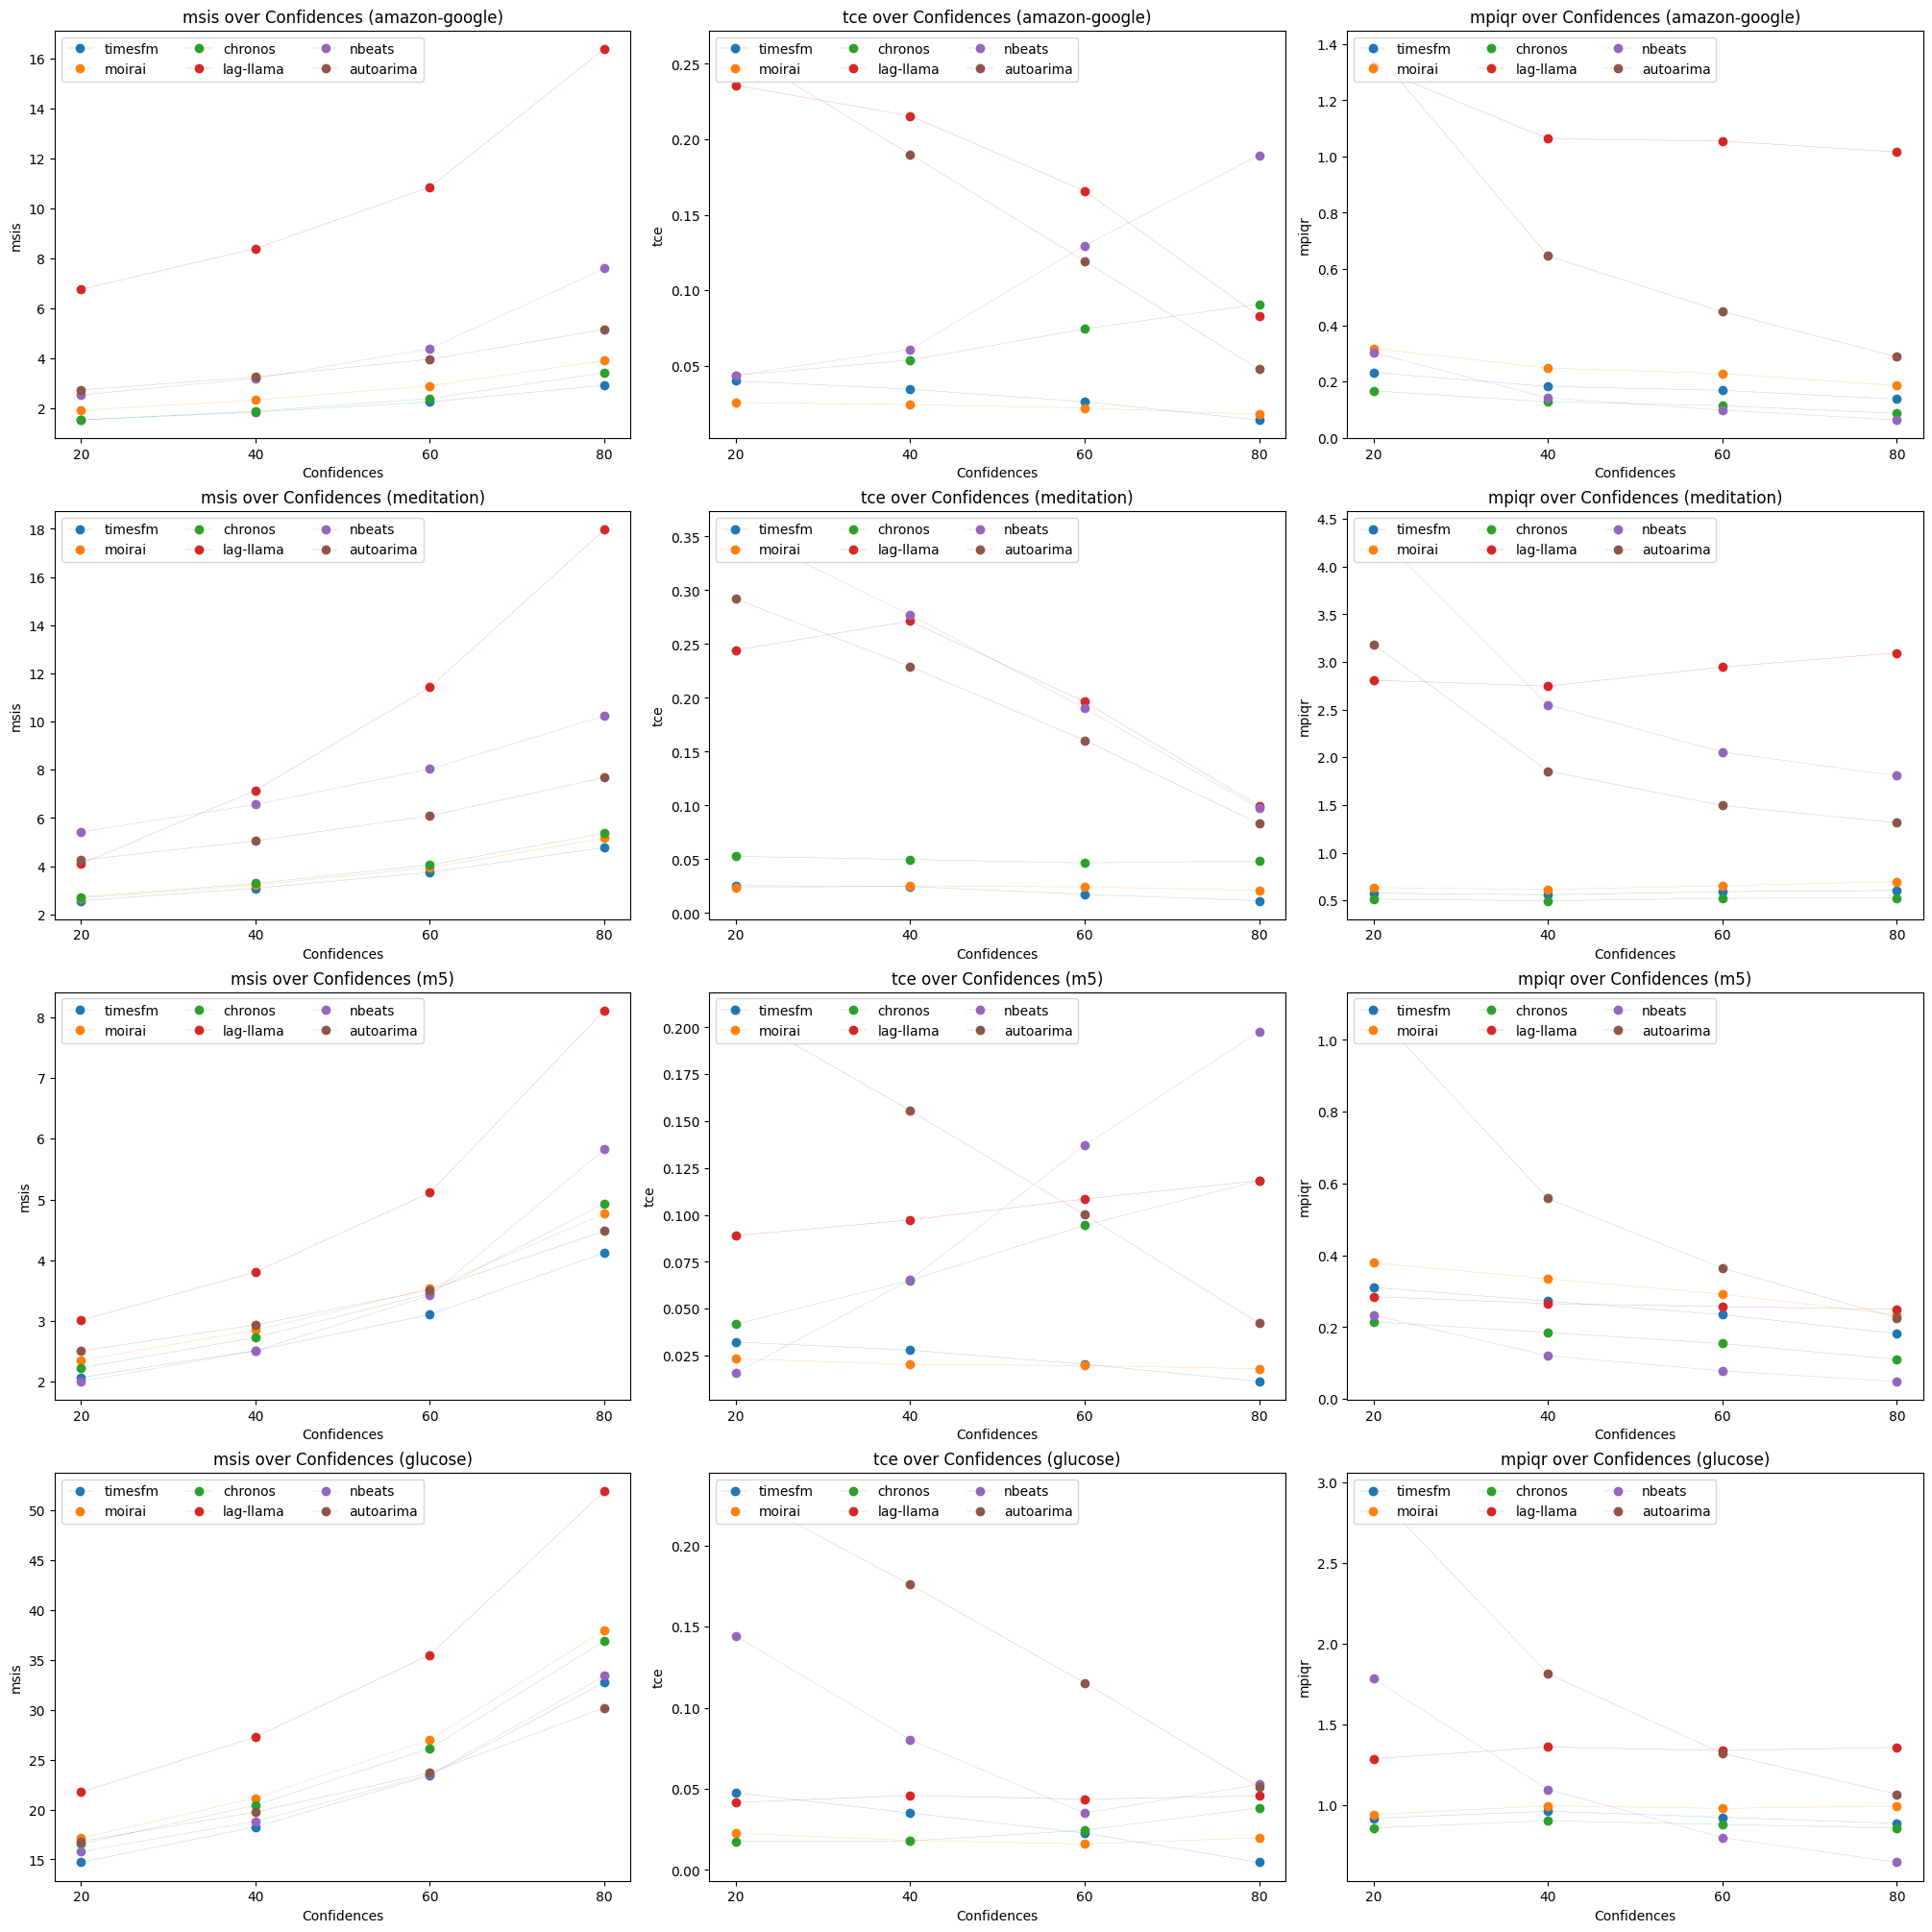

In [60]:
# Line Plot Metrics over Confidences
q_metrics = ['msis', 'tce', 'mpiqr']
# model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(models)]
fig, axes = plt.subplots(4, 3, layout='constrained', figsize=(20,20))
for i, dataset in enumerate(datasets):
    for j, metric in enumerate(q_metrics):
        q_metric = [f'{metric}_{confidence}' for confidence in confidences]
        ax = axes[i, j]
        for k, model in enumerate(models):
            y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric'].isin(q_metric)), ['metric', 'avg_result']]
            y = y.sort_values(by='metric')['avg_result'].to_numpy().flatten()
            ax.plot(np.arange(len(confidences)), y, label=model, marker='o', lw=0.3, ls=':')
            
        ax.set_ylabel(metric)
        ax.set_xlabel("Confidences")
        ax.set_title(f'{metric} over Confidences ({dataset})')
        ax.set_xticks(np.arange(len(confidences)), confidences)
        ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/line_plot_all_metrics_per_confidence_{dataset}.png')
plt.show()

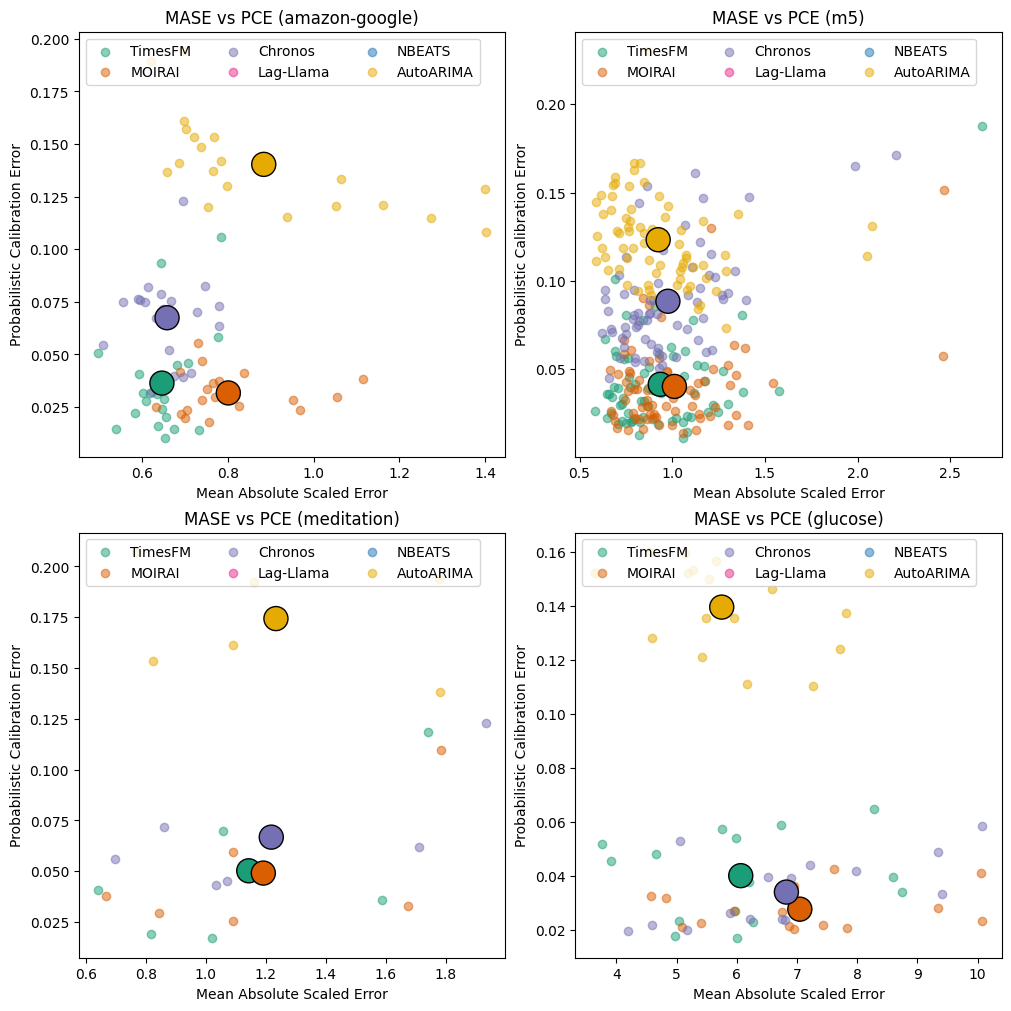

In [27]:
# PCE x MASE plots
model_names = ['TimesFM', 'MOIRAI', 'Chronos', 'Lag-Llama', 'NBEATS', 'AutoARIMA']
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(10,10))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    x_means = []
    y_means = []
    for model_color, model, model_name in zip(model_colors, models, model_names):
        time_series_ind = [str(i) for i in range(1,num_timeseries[dataset]+1)]
        x = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']=='mase'), time_series_ind]
        y = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']=='pce'), time_series_ind]
        ax.scatter(x, y, c=model_color, label=model_name, alpha=0.5)
        x_means.append(np.mean(x))
        y_means.append(np.mean(y))
    
    ax.scatter(x_means, y_means, c=model_colors, s=300, edgecolors='black', alpha=1)
    ax.set_xlabel('Mean Absolute Scaled Error')
    ax.set_ylabel('Probabilistic Calibration Error')
    ax.set_title(f'MASE vs PCE ({dataset})')
    ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/scatter_plot_mase_pce.png')
plt.savefig(f'figures/scatter_plot_mase_pce.svg')
plt.show()

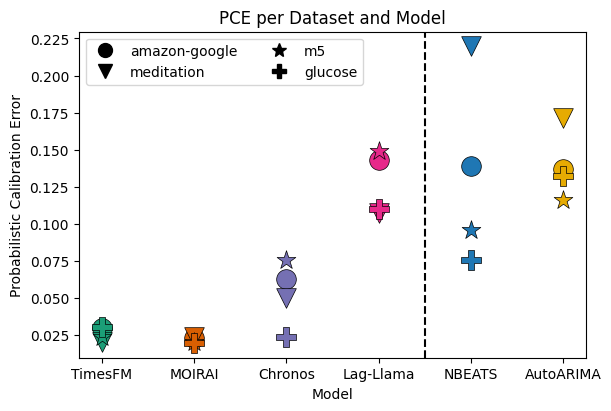

In [28]:
# Plot PCE over datasets
fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

custom_legend_dots = []
# for model, model_color in zip(models, model_colors):
#     custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=10, lw=0))

for dataset, dataset_marker in zip(datasets, dataset_markers):
    for i, model in enumerate(models):
        y = df.loc[(df['metric']=='pce') & (df['model']==model) & (df['dataset']==dataset), 'avg_result'].item()
        ax.scatter(i, y, marker=dataset_marker, c=model_colors[i], s=200, edgecolors='black', lw=0.5)

ax.axvline(3.5, ls='--', color='black')

ax.set_ylabel('Probabilistic Calibration Error')
ax.set_xlabel('Model')
ax.set_title(f'PCE per Dataset and Model')
ax.set_xticks(range(len(models)), model_names)
ax.legend(custom_legend_dots, [*datasets], ncols=2)
plt.savefig(f'figures/dot_plot_pce.png')
plt.savefig(f'figures/dot_plot_pce.svg')
plt.show()

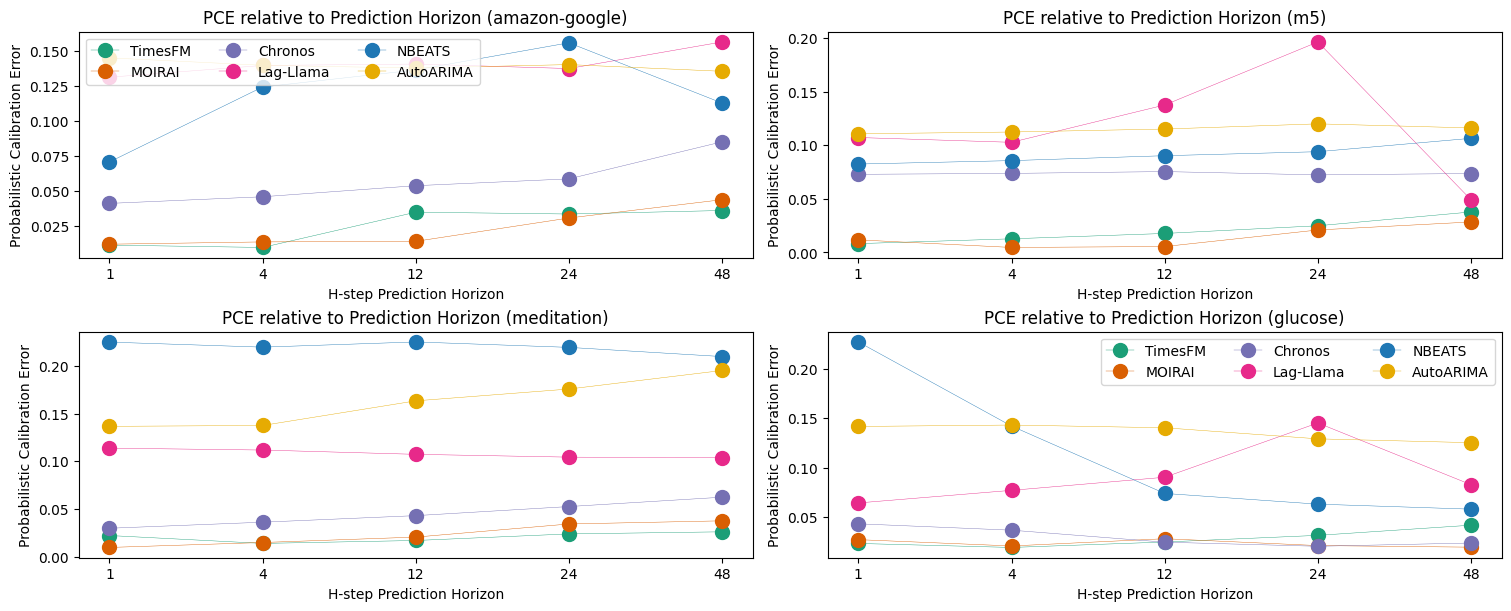

In [29]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    for model_color, model, model_name in zip(model_colors, models, model_names):
        y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']=='pce'), pred_horizon].to_numpy().flatten()
        ax.plot(np.arange(len(pred_horizon)), y, label=model_name, marker='o', lw=0.3, c=model_color, markersize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.   
    ax.set_ylabel('Probabilistic Calibration Error')
    ax.set_xlabel("H-step Prediction Horizon")
    ax.set_title(f'PCE relative to Prediction Horizon ({dataset})')
    ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
    if i == 0:
        ax.legend(loc='upper left', ncols=3)
    elif i == 3:
        ax.legend(loc='upper right', ncols=3)
    # ax.set_ylim(0,0.25)

plt.savefig(f'figures/line_plot_pce_pred_horizon.png')
plt.savefig(f'figures/line_plot_pce_pred_horizon.svg')
plt.show()